# Pentatonic Television: Predicting Future TV buyers

--------------------

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

# To be able to view all of the columns when viewing the dataset
pd.options.display.max_columns = None

/Users/Dariga/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/Dariga/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/Dariga/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 

#  1-Data Exploration
## 1.1 The Data

In [2]:
# Loading the data
electronics = pd.read_csv("electronics.csv")
profile = pd.read_excel('profile.xlsx')
datasets = [electronics, profile]

In [3]:
# Functions used in this project
        
def creating_distplot(size, data, features):
    plt.figure(figsize=size)
    for i in range(len(features)):
        plt.subplot(5, 3, i+1)
        sns.distplot(data[features[i]])
        
def creating_boxplots(size, target, features, data):
    plt.figure(figsize=size)
    for i in range(len(numerical_vars)):
        plt.subplot(5, 3, i+1)
        sns.boxplot(x=target, y=features[i], data=data )

def crossCorrelation(data):
    corr = data.corr()
    plt.figure(figsize=(10,6))
    sns.heatmap(corr, 
          xticklabels=corr.columns.values,
          yticklabels=corr.columns.values)
    print(corr)

## 1.2 Data Description & Preprocessing

In [4]:
# First, let's look at the description of each data set
print(electronics.info())
print()
print(profile.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20500 entries, 0 to 20499
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date of year       20490 non-null  object 
 1   clients            20500 non-null  int64  
 2   previously_shoped  20490 non-null  float64
 3   member             20490 non-null  float64
 4   promotion          20490 non-null  float64
 5   shop_competitor    20490 non-null  float64
 6   prize_won          20490 non-null  float64
 7   require_financing  20490 non-null  float64
 8   got_a_TV           20490 non-null  float64
 9   did_a purchase     20490 non-null  float64
 10  promotions_used    20490 non-null  float64
 11  LT_clients         20490 non-null  float64
 12  prize_amount       20490 non-null  float64
 13  amount_financing   20490 non-null  float64
 14  amount_purchase    19477 non-null  float64
 15  nb_electronics     20490 non-null  float64
dtypes: float64(14), int64(

We can observe some missing values, and the date column for the first data set can be converted to a datetime format.

In [5]:
electronics.head()

,Date of year,clients,previously_shoped,member,promotion,shop_competitor,prize_won,require_financing,got_a_TV,did_a purchase,promotions_used,LT_clients,prize_amount,amount_financing,amount_purchase,nb_electronics
0,2018-08-31,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,14.0,0.000000,0.0,NaN,1.0
1,2017-10-31,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,12.0,133.125000,0.0,1480.0,1.0
2,2018-05-31,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,6.0,0.000000,0.0,3360.0,1.0
3,2018-01-31,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,7.0,0.000000,0.0,970.0,1.0
4,2018-10-31,5,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,2.0,9.0,146.458333,0.0,3380.0,0.0


In [6]:
# Let's use pandas' method to convert to datetime
electronics['Date of year']= pd.to_datetime(electronics['Date of year'])
electronics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20500 entries, 0 to 20499
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date of year       20490 non-null  datetime64[ns]
 1   clients            20500 non-null  int64         
 2   previously_shoped  20490 non-null  float64       
 3   member             20490 non-null  float64       
 4   promotion          20490 non-null  float64       
 5   shop_competitor    20490 non-null  float64       
 6   prize_won          20490 non-null  float64       
 7   require_financing  20490 non-null  float64       
 8   got_a_TV           20490 non-null  float64       
 9   did_a purchase     20490 non-null  float64       
 10  promotions_used    20490 non-null  float64       
 11  LT_clients         20490 non-null  float64       
 12  prize_amount       20490 non-null  float64       
 13  amount_financing   20490 non-null  float64       
 14  amount

## 1.3 Assessing Missing Values

In [7]:
# Before merging the different datasets together, we want to assess if any missing values
# can be found in the different datasets
def null_columns(df):
    return(pd.isnull(df).sum())

for dataset in datasets:
    print("The data set has", dataset.shape[0], "rows and", dataset.shape[1], "columns")
    print(null_columns(dataset))


The data set has 20500 rows and 16 columns
Date of year           10
clients                 0
previously_shoped      10
member                 10
promotion              10
shop_competitor        10
prize_won              10
require_financing      10
got_a_TV               10
did_a purchase         10
promotions_used        10
LT_clients             10
prize_amount           10
amount_financing       10
amount_purchase      1023
nb_electronics         10
dtype: int64
The data set has 20500 rows and 11 columns
date                         0
clients                      0
female                       0
email                        0
live_with_parents            0
work                         0
family                       0
state                        0
education                    0
age                          0
monthly_spent_electronics    0
dtype: int64


## 1.4 Investigating the dataset 'electronics'

In [8]:
# Major problem with got_a_TV with missing value. And as it will be our target variable, we will delete those samples
new_elect = electronics[~electronics['got_a_TV'].isna()]

# Let's look at the output
print(new_elect.isna().sum())

# Let's track the size of this data set:
print('Size: ',new_elect.shape)

Date of year            0
clients                 0
previously_shoped       0
member                  0
promotion               0
shop_competitor         0
prize_won               0
require_financing       0
got_a_TV                0
did_a purchase          0
promotions_used         0
LT_clients              0
prize_amount            0
amount_financing        0
amount_purchase      1013
nb_electronics          0
dtype: int64
Size:  (20490, 16)


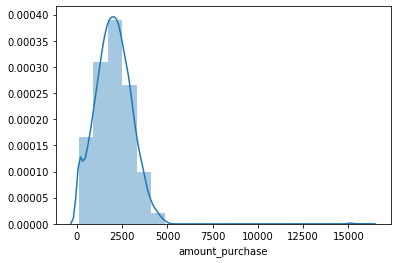

In [9]:
new_elect.head()
new_elect[new_elect['amount_purchase'].isna()]
new_elect['amount_purchase'].describe()

# Remove the missing values to see the distribution to see if we should do an imputation by the mean or median
tmp = new_elect[~new_elect['amount_purchase'].isna()]

# Look at the distribution
sns.distplot(tmp["amount_purchase"], bins=20)

As there are some extreme values, imputting with median will be a better solution, however let's explore further

In [10]:
new_elect.head()

,Date of year,clients,previously_shoped,member,promotion,shop_competitor,prize_won,require_financing,got_a_TV,did_a purchase,promotions_used,LT_clients,prize_amount,amount_financing,amount_purchase,nb_electronics
0,2018-08-31,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,14.0,0.000000,0.0,NaN,1.0
1,2017-10-31,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,12.0,133.125000,0.0,1480.0,1.0
2,2018-05-31,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,6.0,0.000000,0.0,3360.0,1.0
3,2018-01-31,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,7.0,0.000000,0.0,970.0,1.0
4,2018-10-31,5,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,2.0,9.0,146.458333,0.0,3380.0,0.0


In [11]:
# Promotions_used vs. promotion ?
# Look at the two columns
new_elect[['promotion', 'promotions_used']]

# Proportion of promotion used when promotion = 0:(Number of promotions used by customers who are supposed not to use them judging by 'promotion' column):
promo_0 = new_elect[new_elect['promotion'] == 0]
print(promo_0['promotions_used'].value_counts())


# Proportion of promotion used when promotion = 1:
promo_1 = new_elect[new_elect['promotion'] == 1]
print(promo_1['promotions_used'].value_counts())

# Proportion of promotions:
print(new_elect['promotion'].value_counts())

# Remove clients with  promotions_used > 6
new_elect = new_elect[new_elect['promotions_used'] < 6]


1.0     5037
2.0     5009
3.0     1666
4.0      386
5.0       94
12.0       6
13.0       1
Name: promotions_used, dtype: int64
2.0     3451
1.0     3430
3.0     1093
4.0      239
5.0       74
13.0       2
12.0       2
Name: promotions_used, dtype: int64
0.0    12199
1.0     8291
Name: promotion, dtype: int64


Judging by the outputs we doubt in correctness of 'promotion' column

In [12]:
# Understand the logic between columns
new_elect[['previously_shoped', 'did_a purchase', 'got_a_TV', 'amount_purchase']].head()

,previously_shoped,did_a purchase,got_a_TV,amount_purchase
0,0.0,0.0,0.0,NaN
1,0.0,1.0,0.0,1480.0
2,0.0,1.0,0.0,3360.0
3,0.0,1.0,0.0,970.0
4,1.0,1.0,0.0,3380.0


In [13]:
# Look at "did_a purchase" and 'amount_purchase'
new_elect[['did_a purchase', 'amount_purchase']]

,did_a purchase,amount_purchase
0,0.0,NaN
1,1.0,1480.0
2,1.0,3360.0
3,1.0,970.0
4,1.0,3380.0
...,...,...
20485,1.0,3330.0
20486,1.0,2610.0
20487,1.0,2940.0
20488,1.0,2960.0


In [14]:
# Let's look at how many zeros we have for 'did_a purchase'
new_elect[['did_a purchase','amount_purchase']][new_elect['did_a purchase'] == 0]

,did_a purchase,amount_purchase
0,0.0,NaN
14,0.0,NaN
27,0.0,NaN
30,0.0,NaN
116,0.0,NaN
...,...,...
20447,0.0,NaN
20453,0.0,NaN
20454,0.0,NaN
20462,0.0,NaN


In [15]:
# How many NaN do we have associated with did_a purchase = 0?
new_elect[new_elect['did_a purchase'] == 0].shape

(1013, 16)

In [16]:
# Interestingly, it matches all the NaNs in this column
# Therefore, we should encode the missing value as 0
new_elect = new_elect.fillna(0)

In [17]:
# Is "require_financing" compatible with "amount_financing"?
new_elect[['require_financing', 'amount_financing']]

,require_financing,amount_financing
0,0.0,0.00000
1,0.0,0.00000
2,0.0,0.00000
3,0.0,0.00000
4,0.0,0.00000
...,...,...
20485,0.0,0.00000
20486,1.0,24625.00000
20487,0.0,0.00000
20488,0.0,0.00000


In [18]:
# Look at the amount financed for clients requiring no financing
new_elect[new_elect['amount_financing'] == 0]['require_financing'].value_counts()

0.0    15381
Name: require_financing, dtype: int64

In [19]:
# Check if clients who have required financing didn't get 0$
(new_elect[new_elect['require_financing'] == 1]['amount_financing'] == 0).sum()

0

In [20]:
# Let's look at the columns
new_elect[['prize_won', 'prize_amount']]

,prize_won,prize_amount
0,0.0,0.000000
1,0.0,133.125000
2,0.0,0.000000
3,0.0,0.000000
4,1.0,146.458333
...,...,...
20485,1.0,144.166667
20486,0.0,0.000000
20487,0.0,0.000000
20488,1.0,0.000000


In [21]:
# Huge discrepancies between these to columns
# Random assumptions here: Assuming that prize amount is right
new_elect = new_elect.drop('prize_won', axis=1)


In [22]:
# Sanity check:
new_elect.describe()

,clients,previously_shoped,member,promotion,shop_competitor,require_financing,got_a_TV,did_a purchase,promotions_used,LT_clients,prize_amount,amount_financing,amount_purchase,nb_electronics
count,20479.000000,20479.000000,20479.000000,20479.000000,20479.000000,20479.000000,20479.000000,20479.000000,20479.000000,20479.000000,20479.000000,20479.000000,20479.000000,20479.000000
mean,10246.916890,0.091606,0.250647,0.404658,0.349919,0.248938,0.100640,0.950535,1.806924,10.174081,58.040910,5356.554275,1918.016016,0.413448
std,5914.673294,0.363926,0.433396,0.490838,0.476956,0.432408,0.300858,0.216843,0.840735,6.201481,82.435018,11306.091089,1098.013382,0.492464
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5125.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,7.000000,0.000000,0.000000,1200.000000,0.000000
50%,10247.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,10.000000,0.000000,0.000000,1940.000000,0.000000
75%,15368.500000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,2.000000,13.000000,130.972222,0.000000,2630.000000,1.000000
max,20490.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,131.000000,942.916667,212458.333300,16050.000000,1.000000


In [23]:
# Let's look at 'previously_shoped' feature: Unusual values
new_elect.previously_shoped.value_counts()

0.0    18715
1.0     1750
9.0       14
Name: previously_shoped, dtype: int64

In [24]:
# Remove observations with value = 9:
new_elect = new_elect[new_elect['previously_shoped'] != 9]

## 1.5 Investigating the dataset 'profile'

In [25]:
# Now, let's look at the profile data set
profile.describe()

# Lots of unusual observations :-). 

,clients,female,email,live_with_parents,work,family,state,education,age,monthly_spent_electronics
count,20500.000000,20500.000000,20500.000000,20500.000000,20500.000000,20500.000000,20500.000000,20500.000000,20500.000000,20500.000000
mean,10250.500000,0.549268,0.748293,0.296390,2.807317,1.042537,4.165659,2.703366,68.203073,5031.760163
std,5917.984595,0.544755,0.434005,0.456676,1.578659,2.693281,1.753248,1.513250,112.733445,2721.385233
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,23.000000,833.333333
25%,5125.750000,0.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,41.000000,3833.333333
50%,10250.500000,1.000000,1.000000,0.000000,2.000000,0.000000,5.000000,3.000000,54.000000,5000.000000
75%,15375.250000,1.000000,1.000000,1.000000,4.000000,2.000000,6.000000,4.000000,68.000000,6083.333333
max,20500.000000,9.000000,1.000000,1.000000,6.000000,99.000000,6.000000,5.000000,1003.000000,94333.333330


In [26]:
# Female column: 
print(profile.female.value_counts())

# Level 9 is undefined; we will consider it as an error
# To keep the raw original data set intact, we are going to create a new df through this step
new_profile = profile[profile['female'] < 2]


1    11134
0     9352
9       14
Name: female, dtype: int64


In [27]:
# Let's look at the family column
print(new_profile['family'].value_counts())

# Let's remove rows with a value of 99
#new_profile = new_profile[profile['family'] < 10]


0     12158
2      2755
1      2263
3      1520
4      1089
5       555
6       133
99       11
7         2
Name: family, dtype: int64


In [28]:
# Based on the given description family column should be binary, however, it looks more like the amount of siblings
# That's why we will converted those who have at least 1 child as 1, others as 0
new_profile['family'] = [0 if x == 0
                 else 1
                 for x in new_profile['family']]

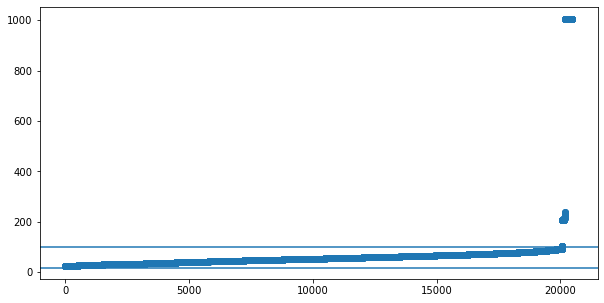

In [29]:
# Let's look at the age
# First, let's order age and reset the index
tmp = new_profile.sort_values('age').reset_index(drop=True)
plt.figure(figsize=(10,5))
plt.scatter(tmp.index, tmp.age)
plt.axhline(100)
plt.axhline(18)

# Let's remove all clients above 100
new_profile = new_profile[new_profile['age'] <100]

In [30]:
# Time to merge the two data sets
# Let's look at the size of our respective data sets
print('profile: ', new_profile.shape)
print('electronics: ', new_elect.shape)

# Merge the data sets
data = pd.merge(new_profile, new_elect, left_on='clients', right_on='clients', how='inner')
data.shape

profile:  (20065, 11)
electronics:  (20465, 15)


(20030, 25)

In [31]:
# Assessing if any duplicates are included in the various datasets:
data.duplicated().sum()


0

In [32]:
# Addressing seasonality, and maybe creating a new feature?
data[['date', 'Date of year']]


,date,Date of year
0,2018-08-31,2018-08-31
1,2017-10-31,2017-10-31
2,2018-05-31,2018-05-31
3,2018-01-31,2018-01-31
4,2018-10-31,2018-10-31
...,...,...
20025,2017-10-31,2018-02-28
20026,2018-03-31,2018-04-30
20027,2018-04-30,2018-09-30
20028,2017-10-31,2018-07-31


In [33]:
# Can we use the date with confidence?
(data['date'] == data['Date of year']).sum()

1699

In [34]:
# We will drop both columns
data = data.drop(['date', 'Date of year'], axis=1)

In [35]:
data.head()

,clients,female,email,live_with_parents,work,family,state,education,age,monthly_spent_electronics,previously_shoped,member,promotion,shop_competitor,require_financing,got_a_TV,did_a purchase,promotions_used,LT_clients,prize_amount,amount_financing,amount_purchase,nb_electronics
0,1,1,1,1,1,1,5,1,40,5916.666667,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,14.0,0.000000,0.0,0.0,1.0
1,2,0,1,0,3,0,1,3,57,5583.333333,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,12.0,133.125000,0.0,1480.0,1.0
2,3,1,1,0,3,1,6,2,46,2666.666667,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,6.0,0.000000,0.0,3360.0,1.0
3,4,1,1,0,2,1,5,5,72,5833.333333,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,7.0,0.000000,0.0,970.0,1.0
4,5,1,1,0,2,1,6,1,79,4916.666667,1.0,0.0,1.0,1.0,0.0,0.0,1.0,2.0,9.0,146.458333,0.0,3380.0,0.0


## 1.6 Re-encoding Some Features

In [36]:
# Encoding some features into a more adequate format

# Encode State feature
data['state'] = ['California' if x == 1
                else 'Vermont' if x == 2
                else 'Colorado' if x == 3
                else 'Hawaii' if x == 4
                else 'Maine' if x == 5
                else 'Illinois'
                for x in data['state']]

# Encode Work feature 
data['work'] = ['professional' if x == 1
               else 'manager' if x == 2
               else 'blue_collar' if x == 3
               else 'white_Collar' if x == 4
               else 'retired' if x == 5
               else 'no_job'
               for x in data['work']]

In [37]:
data.head()

,clients,female,email,live_with_parents,work,family,state,education,age,monthly_spent_electronics,previously_shoped,member,promotion,shop_competitor,require_financing,got_a_TV,did_a purchase,promotions_used,LT_clients,prize_amount,amount_financing,amount_purchase,nb_electronics
0,1,1,1,1,professional,1,Maine,1,40,5916.666667,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,14.0,0.000000,0.0,0.0,1.0
1,2,0,1,0,blue_collar,0,California,3,57,5583.333333,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,12.0,133.125000,0.0,1480.0,1.0
2,3,1,1,0,blue_collar,1,Illinois,2,46,2666.666667,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,6.0,0.000000,0.0,3360.0,1.0
3,4,1,1,0,manager,1,Maine,5,72,5833.333333,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,7.0,0.000000,0.0,970.0,1.0
4,5,1,1,0,manager,1,Illinois,1,79,4916.666667,1.0,0.0,1.0,1.0,0.0,0.0,1.0,2.0,9.0,146.458333,0.0,3380.0,0.0


## 2.0 Some Data Visualization

                            clients    female     email  live_with_parents  \
clients                    1.000000 -0.005803 -0.004736           0.007651   
female                    -0.005803  1.000000  0.019537           0.013417   
email                     -0.004736  0.019537  1.000000          -0.001747   
live_with_parents          0.007651  0.013417 -0.001747           1.000000   
family                    -0.005818 -0.003342 -0.007728           0.004004   
education                 -0.001242  0.008918 -0.000328           0.011240   
age                       -0.008676 -0.000424  0.012017          -0.003859   
monthly_spent_electronics  0.003395 -0.008261 -0.015695           0.001641   
previously_shoped          0.004256  0.015079  0.010124           0.010096   
member                    -0.008646  0.009904  0.002562          -0.008407   
promotion                  0.009512  0.000860  0.001541          -0.005885   
shop_competitor           -0.008815 -0.010217  0.010543         

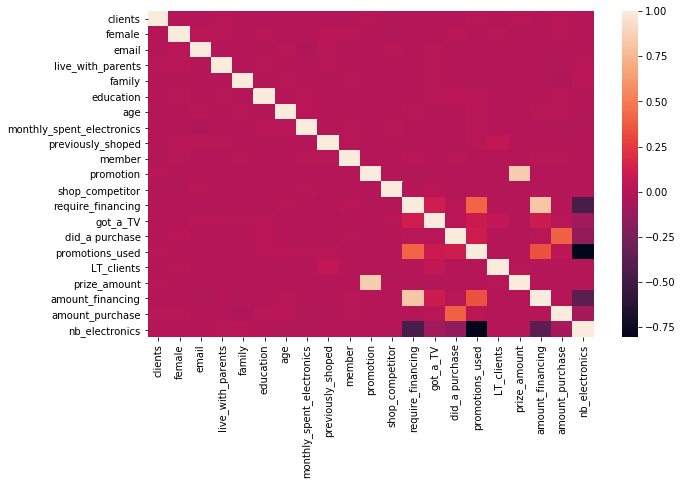

In [38]:
crossCorrelation(data)

0.0    18010
1.0     2020
Name: got_a_TV, dtype: int64

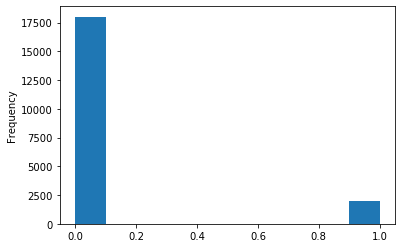

In [39]:
#sns.distplot(data["got_a_TV"])
data["got_a_TV"].plot.hist()
data["got_a_TV"].value_counts()

<function __main__.creating_distplot(size, data, features)>

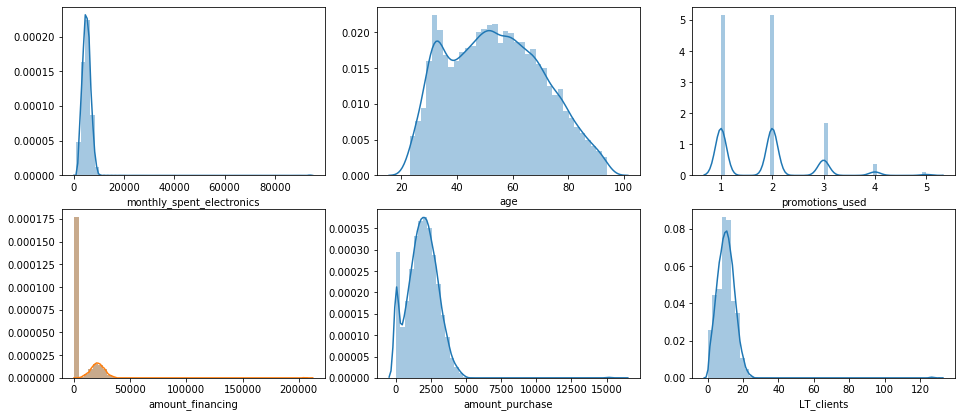

In [40]:
def creating_distplot(size, data, features):
    plt.figure(figsize=size)
    for i in range(len(features)):
        plt.subplot(5, 3, i+1)
        try:
            sns.distplot(data[features[i]])
        except RuntimeError as re:
            if str(re).startswith("Selected KDE bandwidth is 0. Cannot estimate density."):
                sns.distplot(data[features[i]],kde_kws={'bw': 0.1})

num_vars = ['monthly_spent_electronics', 'age', 'promotions_used', 'amount_financing', 'amount_purchase', 'LT_clients']

# Creating distribution plots
creating_distplot((16,18), data, num_vars)
creating_distplot

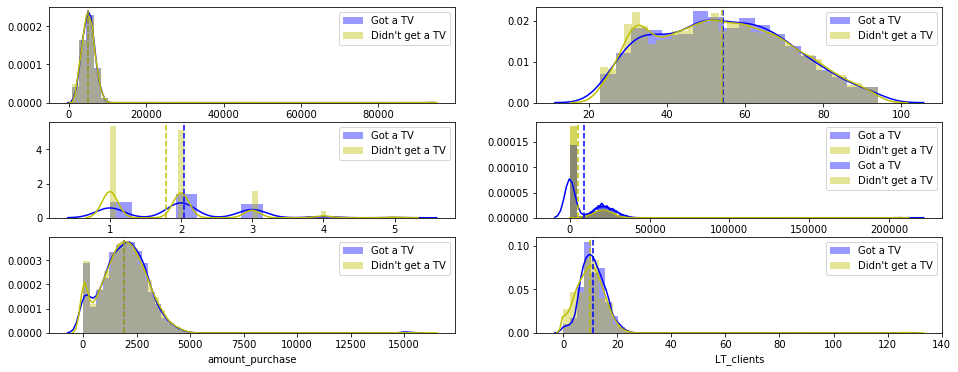

In [41]:
# Subsetting by 'got a TV'!
bought_tv = data["got_a_TV"] == 1
no_tv = data["got_a_TV"] == 0

# Creating the plots
features = ['monthly_spent_electronics', 'age', 'promotions_used', 'amount_financing', 'amount_purchase', 'LT_clients']
labels = ['Got a TV', "Didn't get a TV"]

def creating_plots(features, labels):
    plt.figure(figsize=(16,6))
    for feature in features:
        plt.subplot(3, 2, features.index(feature)+1)
        try:
            sns.distplot(data[feature][bought_tv], label=labels[0], color="b")
            sns.distplot(data[feature][no_tv], label=labels[1], color="y")
        except RuntimeError as re:
            if str(re).startswith("Selected KDE bandwidth is 0. Cannot estimate density."):
                sns.distplot(data[feature][bought_tv], label=labels[0], color="b",kde_kws={'bw': 0.1})
                sns.distplot(data[feature][no_tv], label=labels[1], color="y",kde_kws={'bw': 0.1})
        plt.axvline(data[feature][bought_tv].mean(), linestyle = '--', color="b")
        plt.axvline(data[feature][no_tv].mean(), linestyle = '--', color="y")
        plt.legend()
creating_plots(features, labels)

## 3.0 Encoding Categorical Features for Machine Learning

In [42]:
# One-hot Encoding
data = pd.get_dummies(data)

In [43]:
data.head()

,clients,female,email,live_with_parents,family,education,age,monthly_spent_electronics,previously_shoped,member,promotion,shop_competitor,require_financing,got_a_TV,did_a purchase,promotions_used,LT_clients,prize_amount,amount_financing,amount_purchase,nb_electronics,work_blue_collar,work_manager,work_no_job,work_professional,work_retired,work_white_Collar,state_California,state_Colorado,state_Hawaii,state_Illinois,state_Maine,state_Vermont
0,1,1,1,1,1,1,40,5916.666667,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,14.0,0.000000,0.0,0.0,1.0,0,0,0,1,0,0,0,0,0,0,1,0
1,2,0,1,0,0,3,57,5583.333333,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,12.0,133.125000,0.0,1480.0,1.0,1,0,0,0,0,0,1,0,0,0,0,0
2,3,1,1,0,1,2,46,2666.666667,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,6.0,0.000000,0.0,3360.0,1.0,1,0,0,0,0,0,0,0,0,1,0,0
3,4,1,1,0,1,5,72,5833.333333,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,7.0,0.000000,0.0,970.0,1.0,0,1,0,0,0,0,0,0,0,0,1,0
4,5,1,1,0,1,1,79,4916.666667,1.0,0.0,1.0,1.0,0.0,0.0,1.0,2.0,9.0,146.458333,0.0,3380.0,0.0,0,1,0,0,0,0,0,0,0,1,0,0


## 4.0 Model Selection: 

In [44]:
evaluation = pd.DataFrame({'Model': [],
                           'Confusion Matrix':[],
                           'Accuracy on Train':[],
                           'Accuracy on Test':[],
                           '5-Fold Cross Validation (Precision)':[],
                           'Precision (test)':[],
                          'Roc_Auc':[]})

In [45]:
# Separating the target and the explanatory features
y = data['got_a_TV']
X = data.drop(["clients", "got_a_TV"], axis=1)

# Creating the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_auc_score, precision_score

def upsampling_data(X, y):
    # Upsampling the training set
    # Upsample using SMOTE
    sm = SMOTE(random_state=42, ratio=1.0)
    X_sm, y_sm = sm.fit_sample(X_train, y_train)
    return X_sm, y_sm


def minmax_data(X_train, X_test):
    # Standardization of the training and testing sets
    scaler = MinMaxScaler()
    X_train_sc = scaler.fit_transform(X_train)
    X_test_sc = scaler.transform(X_test)
    return X_train_sc, X_test_sc
    
    
def model_building(X_train, y_train, metrics, cv, model):
    # Performing cross validation
    cv_score = cross_val_score(model, X_train, y_train, cv=cv, scoring=metrics).mean()
    return cv_score


def model_predict(model, X_train, y_train, X_topredict, y_true):    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_topredict)
    precision_test = precision_score(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred)
    roc_auc= roc_auc_score(y_true, y_pred)
    return precision_test, list(conf_matrix), roc_auc

In [47]:
X_train_sm, y_train_sm = upsampling_data(X_train, y_train)
X_train_sm_sc, X_test_sc = minmax_data(X_train_sm, X_test)

### A. Logistic regression

In [57]:
evaluation.loc[0]=['-','-','-','-','-','-','-']

In [50]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_auc_score, precision_score

model_lr = LogisticRegression(random_state=42)

cv_score = model_building(X_train_sm_sc, y_train_sm, 'precision', 5, model_lr)
metrics, conf_matrix, roc_auc = model_predict(model_lr, X_train_sm_sc, y_train_sm, X_test_sc, y_test)
acc_train=model_lr.score(X_train_sm_sc,y_train_sm)
acc_test=model_lr.score(X_test_sc,y_test)
i = evaluation.shape[0]
evaluation.loc[i] = ['Logistic regression',conf_matrix,acc_train,acc_test,cv_score, metrics,roc_auc]

In [51]:
evaluation

,Model,Confusion Matrix,Accuracy on Train,Accuracy on Test,5-Fold Cross Validation (Precision),Precision (test),Roc_Auc
0,-,-,-,-,-,-,-
1,Logistic regression,"[[2226, 1376], [161, 243]]",0.574958,0.616326,0.5796,0.150093,0.609738


In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ["l2","l1","elasticnet"]
c_values = [10, 1.0, 0.1, 0.01]

# define grid search
grid = dict(solver=solvers,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)
grid_search = GridSearchCV(estimator=model_lr, param_grid=grid, cv=cv, scoring='roc_auc')
grid_result = grid_search.fit(X_train_sm_sc, y_train_sm)

    # summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


Best: 0.620879 using {'C': 10, 'solver': 'newton-cg'}


In [53]:
model_lr_best = LogisticRegression(C=10, solver='newton-cg',random_state=42, class_weight=None)
model_lr_best.fit(X_train_sm_sc,y_train_sm)
cv_score = model_building(X_train_sm_sc, y_train_sm, 'roc_auc', 5, model_lr_best)
metrics, conf_matrix, roc_auc = model_predict(model_lr_best, X_train_sm_sc, y_train_sm, X_test_sc, y_test)
acc_train=model_lr_best.score(X_train_sm_sc,y_train_sm)
acc_test=model_lr_best.score(X_test_sc,y_test)

i = evaluation.shape[0]
evaluation.loc[i] = ['Logistic regression C:10,newton-cg',conf_matrix,acc_train,acc_test,cv_score, metrics, roc_auc]

In [54]:
evaluation

,Model,Confusion Matrix,Accuracy on Train,Accuracy on Test,5-Fold Cross Validation (Precision),Precision (test),Roc_Auc
0,-,-,-,-,-,-,-
1,Logistic regression,"[[2226, 1376], [161, 243]]",0.574958,0.616326,0.5796,0.150093,0.609738
2,"Logistic regression C:10,newton-cg","[[2211, 1391], [158, 246]]",0.575618,0.61333,0.621042,0.150275,0.611368


### Feature Importance

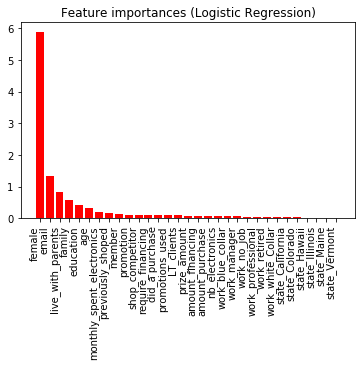

In [55]:

coefs = np.abs(model_lr_best.coef_[0])
indices = np.argsort(coefs)[::-1]

plt.figure()
plt.title("Feature importances (Logistic Regression)")
plt.bar(range(X.shape[1]), coefs[indices[:X.shape[1]]],
       color="r", align="center")
plt.xticks(range(X.shape[1]), X.columns.to_list(), rotation=90, ha='right')
plt.subplots_adjust(bottom=0.2)

In [56]:
lists=['work_blue_collar', 'work_manager',
       'work_no_job', 'work_professional', 'work_retired', 'work_white_Collar',
       'state_California', 'state_Colorado', 'state_Hawaii', 'state_Illinois',
       'state_Maine', 'state_Vermont','amount_purchase','amount_financing']
model_lr_best = LogisticRegression(C=10, solver='newton-cg',random_state=42)
Xdt=data.drop(["clients", "got_a_TV"], axis=1)
Xdt.drop(lists,axis=1,inplace=True)
y=data['got_a_TV']

X_train, X_test, y_train, y_test = train_test_split(Xdt, y, test_size=0.2, random_state=42, stratify=y)
X_traindt, y_traindt = upsampling_data(X_train, y_train)
X_traindt, X_testdt = minmax_data(X_traindt, X_test)


model_lr_best.fit(X_traindt, y_traindt)

cv_score = model_building(X_traindt, y_traindt, 'roc_auc', 5, model_lr_best)
metrics, conf_matrix, roc_auc = model_predict(model_lr_best, X_traindt, y_traindt, X_testdt, y_test)
acc_train=model_lr_best.score(X_traindt,y_traindt)
acc_test=model_lr_best.score(X_testdt,y_test)
i = evaluation.shape[0]
evaluation.loc[i] = ['Reduced Logistic regression',conf_matrix,acc_train,acc_test,cv_score, metrics, roc_auc]

In [57]:
evaluation

,Model,Confusion Matrix,Accuracy on Train,Accuracy on Test,5-Fold Cross Validation (Precision),Precision (test),Roc_Auc
0,-,-,-,-,-,-,-
1,Logistic regression,"[[2226, 1376], [161, 243]]",0.574958,0.616326,0.5796,0.150093,0.609738
2,"Logistic regression C:10,newton-cg","[[2211, 1391], [158, 246]]",0.575618,0.61333,0.621042,0.150275,0.611368
3,Reduced Logistic regression,"[[2359, 1243], [161, 243]]",0.600881,0.649526,0.634763,0.163526,0.6282


Best Threshold=0.503344, G-Mean=0.630


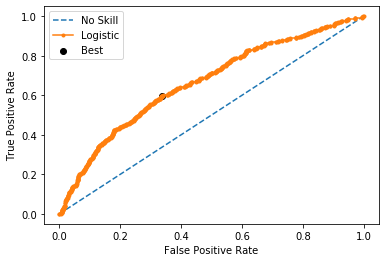

In [58]:
from numpy import sqrt, argmax
from sklearn.metrics import roc_curve
from matplotlib import pyplot
yhat = model_lr_best.predict_proba(X_testdt)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, yhat)
# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model_lr_best
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [59]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_auc_score, precision_score

preds = np.where(model_lr_best.predict_proba(X_testdt)[:,1] > 0.503344, 1, 0)

pd.DataFrame(data=[accuracy_score(y_test, preds),
                   precision_score(y_test, preds), roc_auc_score(y_test, preds)], 
             index=["Accuracy","precision", "roc_auc_score"])

,0
Accuracy,0.656266
precision,0.165636
roc_auc_score,0.629750


In [60]:
# conf_matrix= confusion_matrix(y, preds)
# roc_auc=roc_auc_score(y_test, preds)
# acc_test=model_lr_best.score(X_testdt,preds)
# metrics=precision_score(y_test, preds)
# i = evaluation.shape[0]
# evaluation.loc[i] = ['New Thresh Logistic regression',conf_matrix,"-",acc_test,"-", metrics, roc_auc]

### D. Naive Bayes

In [61]:
from sklearn.naive_bayes import GaussianNB
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train_sm, y_train_sm = upsampling_data(X_train, y_train)
X_train_sm_sc, X_test_sc = minmax_data(X_train_sm, X_test)
#Create a Gaussian Classifier
nb = GaussianNB()

# Train the model using the training sets
nb.fit(X_train_sm_sc, y_train_sm)

cv_score = model_building(X_train_sm_sc, y_train_sm, 'precision', 5, nb)
metrics, conf_matrix, roc_auc = model_predict(nb, X_train_sm_sc, y_train_sm, X_test_sc, y_test)
acc_train=nb.score(X_train_sm_sc,y_train_sm)
acc_test=nb.score(X_test_sc,y_test)

i = evaluation.shape[0]
evaluation.loc[i] = ['Naive Bayes',conf_matrix,acc_train,acc_test,cv_score, metrics, roc_auc]

In [62]:
evaluation

,Model,Confusion Matrix,Accuracy on Train,Accuracy on Test,5-Fold Cross Validation (Precision),Precision (test),Roc_Auc
0,-,-,-,-,-,-,-
1,Logistic regression,"[[2226, 1376], [161, 243]]",0.574958,0.616326,0.5796,0.150093,0.609738
2,"Logistic regression C:10,newton-cg","[[2211, 1391], [158, 246]]",0.575618,0.61333,0.621042,0.150275,0.611368
3,Reduced Logistic regression,"[[2359, 1243], [161, 243]]",0.600881,0.649526,0.634763,0.163526,0.6282
4,Naive Bayes,"[[2379, 1223], [204, 200]]",0.714013,0.643784,0.689823,0.140548,0.577758


In [63]:
from sklearn.naive_bayes import BernoulliNB
nb = BernoulliNB()

# Train the model using the training sets
nb.fit(X_train_sm_sc, y_train_sm)

cv_score = model_building(X_train_sm_sc, y_train_sm, 'precision', 5, nb)
metrics, conf_matrix, roc_auc = model_predict(nb, X_train_sm_sc, y_train_sm, X_test_sc, y_test)
acc_train=nb.score(X_train_sm_sc,y_train_sm)
acc_test=nb.score(X_test_sc,y_test)

i = evaluation.shape[0]
evaluation.loc[i] = ['Bernouli Naive Bayes',conf_matrix,acc_train,acc_test,cv_score, metrics, roc_auc]

In [64]:
evaluation

,Model,Confusion Matrix,Accuracy on Train,Accuracy on Test,5-Fold Cross Validation (Precision),Precision (test),Roc_Auc
0,-,-,-,-,-,-,-
1,Logistic regression,"[[2226, 1376], [161, 243]]",0.574958,0.616326,0.5796,0.150093,0.609738
2,"Logistic regression C:10,newton-cg","[[2211, 1391], [158, 246]]",0.575618,0.61333,0.621042,0.150275,0.611368
3,Reduced Logistic regression,"[[2359, 1243], [161, 243]]",0.600881,0.649526,0.634763,0.163526,0.6282
4,Naive Bayes,"[[2379, 1223], [204, 200]]",0.714013,0.643784,0.689823,0.140548,0.577758
5,Bernouli Naive Bayes,"[[2954, 648], [277, 127]]",0.811979,0.769096,0.807209,0.163871,0.567228


### B. SVM

In [65]:
from sklearn import svm
clf = svm.SVC(random_state=1)
clf = clf.fit(X_train_sm_sc, y_train_sm)

cv_score = model_building(X_train_sm_sc, y_train_sm, 'precision', 5, clf)
metrics, conf_matrix, roc_auc = model_predict(clf, X_train_sm_sc, y_train_sm, X_test_sc, y_test)
acc_train=clf.score(X_train_sm_sc,y_train_sm)
acc_test=clf.score(X_test_sc,y_test)

i = evaluation.shape[0]
evaluation.loc[i] = ['SVM',conf_matrix,acc_train,acc_test,cv_score, metrics, roc_auc]

In [66]:
evaluation

,Model,Confusion Matrix,Accuracy on Train,Accuracy on Test,5-Fold Cross Validation (Precision),Precision (test),Roc_Auc
0,-,-,-,-,-,-,-
1,Logistic regression,"[[2226, 1376], [161, 243]]",0.574958,0.616326,0.5796,0.150093,0.609738
2,"Logistic regression C:10,newton-cg","[[2211, 1391], [158, 246]]",0.575618,0.61333,0.621042,0.150275,0.611368
3,Reduced Logistic regression,"[[2359, 1243], [161, 243]]",0.600881,0.649526,0.634763,0.163526,0.6282
4,Naive Bayes,"[[2379, 1223], [204, 200]]",0.714013,0.643784,0.689823,0.140548,0.577758
5,Bernouli Naive Bayes,"[[2954, 648], [277, 127]]",0.811979,0.769096,0.807209,0.163871,0.567228
6,SVM,"[[3602, 0], [404, 0]]",0.87028,0.899151,1,0,0.5


In [67]:
Cs = [0.001, 0.01, 0.1, 0.5, 1,10]
train_results = []
test_results = []
for c in Cs:
    model = svm.SVC(C=c,random_state=1)
    #model.fit(X, y)
    model.fit(X_train_sm_sc, y_train_sm)
    print(c, 'C')
    pred = model.predict(X_train_sm_sc)
    pred2 = model.predict(X_test_sc)
    roc1 = roc_auc_score(y_train_sm, pred)
    roc2 = roc_auc_score(y_test, pred2)
    print('AUC Train: ', roc1)
    print('AUC Test: ', roc2)
    train_results.append(roc1)
    test_results.append(roc2)
    print (" ")


0.001 C
AUC Train:  0.5837034980566351
AUC Test:  0.6108831177398695
 
0.01 C
AUC Train:  0.6078567462520821
AUC Test:  0.6174684306298481
 
0.1 C
AUC Train:  0.8195446973903387
AUC Test:  0.5053202016481493
 
0.5 C
AUC Train:  0.8554969461410328
AUC Test:  0.5
 
1 C
AUC Train:  0.8702803997779012
AUC Test:  0.5
 
10 C
AUC Train:  0.9032828983897834
AUC Test:  0.5
 


In [68]:
gammas = [0.001, 0.01, 0.1, 1]
train_results = []
test_results = []
for g in gammas:
    model = svm.SVC(C=0.01,gamma=g,random_state=1)
    #model.fit(X, y)
    model.fit(X_train_sm_sc, y_train_sm)
    print(g, 'gamma')
    pred = model.predict(X_train_sm_sc)
    pred2 = model.predict(X_test_sc)
    roc1 = roc_auc_score(y_train_sm, pred)
    roc2 = roc_auc_score(y_test, pred2)
    print(' Train: ', roc1)
    print(' Test: ', roc2)
    train_results.append(roc1)
    test_results.append(roc2)
    print (" ")


0.001 gamma
 Train:  0.5484106052193226
 Test:  0.6161565906729485
 
0.01 gamma
 Train:  0.558335646862854
 Test:  0.6101876845097058
 
0.1 gamma
 Train:  0.7858828428650749
 Test:  0.5426887427776647
 
1 gamma
 Train:  0.6632426429761243
 Test:  0.501098811991138
 


In [69]:
kernel=['linear', 'poly', 'rbf', 'sigmoid']
train_results = []
test_results = []
for k in kernel:
    model = svm.SVC(C=0.01,gamma=0.001,kernel=k,random_state=1)
    #model.fit(X, y)
    model.fit(X_train_sm_sc, y_train_sm)
    print(k, 'kernel')
    pred = model.predict(X_train_sm_sc)
    pred2 = model.predict(X_test_sc)
    roc1 = roc_auc_score(y_train_sm, pred)
    roc2 = roc_auc_score(y_test, pred2)
    print('AUC Train: ', roc1)
    print('AUC Test: ', roc2)
    train_results.append(roc1)
    test_results.append(roc2)
    print (" ")


linear kernel
AUC Train:  0.568364797334814
AUC Test:  0.6149959318530409
 
poly kernel
AUC Train:  0.5739172681843421
AUC Test:  0.598840165804476
 
rbf kernel
AUC Train:  0.5484106052193226
AUC Test:  0.6161565906729485
 
sigmoid kernel
AUC Train:  0.5476471404775125
AUC Test:  0.6158906493092396
 


In [70]:
param_grid = {'kernel': ['sigmoid','linear','rbf','poly']}

# define grid search
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=1)
grid_search = GridSearchCV(estimator=svm.SVC(C=0.01,gamma=0.01), param_grid=param_grid, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0)
grid_result = grid_search.fit(X_train_sm_sc, y_train_sm)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.625003 using {'kernel': 'poly'}


In [71]:
new_clf = svm.SVC(C=0.01 , gamma=0.001,kernel='poly')
new_clf = clf.fit(X_train_sm_sc, y_train_sm)

cv_score = model_building(X_train_sm_sc, y_train_sm, 'roc_auc', 5, new_clf)
metrics, conf_matrix, roc_auc = model_predict(new_clf, X_train_sm_sc, y_train_sm, X_test_sc, y_test)
acc_train=new_clf.score(X_train_sm_sc,y_train_sm)
acc_test=new_clf.score(X_test_sc,y_test)

i = evaluation.shape[0]
evaluation.loc[i] = ['SVM poly',conf_matrix,acc_train,acc_test,cv_score, metrics, roc_auc]

In [72]:
evaluation

,Model,Confusion Matrix,Accuracy on Train,Accuracy on Test,5-Fold Cross Validation (Precision),Precision (test),Roc_Auc
0,-,-,-,-,-,-,-
1,Logistic regression,"[[2226, 1376], [161, 243]]",0.574958,0.616326,0.5796,0.150093,0.609738
2,"Logistic regression C:10,newton-cg","[[2211, 1391], [158, 246]]",0.575618,0.61333,0.621042,0.150275,0.611368
3,Reduced Logistic regression,"[[2359, 1243], [161, 243]]",0.600881,0.649526,0.634763,0.163526,0.6282
4,Naive Bayes,"[[2379, 1223], [204, 200]]",0.714013,0.643784,0.689823,0.140548,0.577758
5,Bernouli Naive Bayes,"[[2954, 648], [277, 127]]",0.811979,0.769096,0.807209,0.163871,0.567228
6,SVM,"[[3602, 0], [404, 0]]",0.87028,0.899151,1,0,0.5
7,SVM poly,"[[3602, 0], [404, 0]]",0.87028,0.899151,0.939881,0,0.5


In [73]:
best_clf = svm.SVC(C=0.01 , gamma=1,kernel='linear')
best_clf = best_clf.fit(X_train_sm_sc, y_train_sm)

cv_score = model_building(X_train_sm_sc, y_train_sm, 'precision', 5, best_clf)
metrics, conf_matrix, roc_auc = model_predict(best_clf, X_train_sm_sc, y_train_sm, X_test_sc, y_test)
acc_train=best_clf.score(X_train_sm_sc,y_train_sm)
acc_test=best_clf.score(X_test_sc,y_test)

i = evaluation.shape[0]
evaluation.loc[i] = ['Tuned SVM',conf_matrix,acc_train,acc_test,cv_score, metrics, roc_auc]

In [74]:
evaluation

,Model,Confusion Matrix,Accuracy on Train,Accuracy on Test,5-Fold Cross Validation (Precision),Precision (test),Roc_Auc
0,-,-,-,-,-,-,-
1,Logistic regression,"[[2226, 1376], [161, 243]]",0.574958,0.616326,0.5796,0.150093,0.609738
2,"Logistic regression C:10,newton-cg","[[2211, 1391], [158, 246]]",0.575618,0.61333,0.621042,0.150275,0.611368
3,Reduced Logistic regression,"[[2359, 1243], [161, 243]]",0.600881,0.649526,0.634763,0.163526,0.6282
4,Naive Bayes,"[[2379, 1223], [204, 200]]",0.714013,0.643784,0.689823,0.140548,0.577758
5,Bernouli Naive Bayes,"[[2954, 648], [277, 127]]",0.811979,0.769096,0.807209,0.163871,0.567228
6,SVM,"[[3602, 0], [404, 0]]",0.87028,0.899151,1,0,0.5
7,SVM poly,"[[3602, 0], [404, 0]]",0.87028,0.899151,0.939881,0,0.5
8,Tuned SVM,"[[2781, 821], [219, 185]]",0.568365,0.740389,0.612716,0.183897,0.614996


In [75]:
best_clf.coef_

array([[-1.19541635e-04,  1.32867100e-04,  1.25468419e-04,
         3.58338978e-04,  1.98173065e-04, -1.22569122e-04,
         5.64951705e-05, -2.03952803e-05, -1.38792310e-04,
         2.14055750e-04,  1.58362681e-04,  1.99655059e+00,
         6.00649260e-04,  3.69604231e-03,  1.82696284e-02,
        -3.40900065e-03,  6.38066494e-03, -4.79773197e-04,
        -2.95127811e-04, -1.85482528e-04,  1.60369066e-04,
        -2.87273899e-04,  1.42289044e-04,  9.59778963e-05,
         7.41204186e-05, -1.47785637e-04,  9.33291521e-05,
         1.72861808e-05,  1.30393423e-04,  1.12799990e-04,
        -2.06023109e-04]])

In [76]:

ls=[-1.19541635e-04,  1.32867100e-04,  1.25468419e-04,
         3.58338978e-04,  1.98173065e-04, -1.22569122e-04,
         5.64951705e-05, -2.03952803e-05, -1.38792310e-04,
         2.14055750e-04,  1.58362681e-04,  1.99655059e+00,
         6.00649260e-04,  3.69604231e-03,  1.82696284e-02,
        -3.40900065e-03,  6.38066494e-03, -4.79773197e-04,
        -2.95127811e-04, -1.85482528e-04,  1.60369066e-04,
        -2.87273899e-04,  1.42289044e-04,  9.59778963e-05,
         7.41204186e-05, -1.47785637e-04,  9.33291521e-05,
         1.72861808e-05,  1.30393423e-04,  1.12799990e-04,
        -2.06023109e-04]

prize_amount                -0.003409
amount_purchase             -0.000480
nb_electronics              -0.000295
work_no_job                 -0.000287
state_Vermont               -0.000206
work_blue_collar            -0.000185
state_California            -0.000148
member                      -0.000139
age                         -0.000123
female                      -0.000120
previously_shoped           -0.000020
state_Hawaii                 0.000017
monthly_spent_electronics    0.000056
work_white_Collar            0.000074
state_Colorado               0.000093
work_retired                 0.000096
state_Maine                  0.000113
live_with_parents            0.000125
state_Illinois               0.000130
email                        0.000133
work_professional            0.000142
shop_competitor              0.000158
work_manager                 0.000160
education                    0.000198
promotion                    0.000214
family                       0.000358
did_a purcha

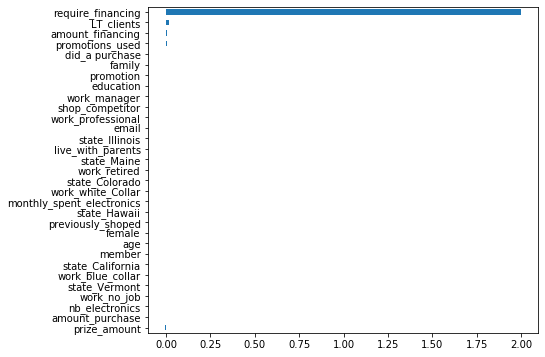

In [77]:
feature_importances = pd.Series(ls, 
                                index=X.columns)

sub_feature_importances = feature_importances
print(sub_feature_importances.sort_values())

sub_feature_importances.sort_values(inplace=True)
sub_feature_importances.plot(kind='barh', figsize=(7,6))

In [78]:
X.columns

Index(['female', 'email', 'live_with_parents', 'family', 'education', 'age',
       'monthly_spent_electronics', 'previously_shoped', 'member', 'promotion',
       'shop_competitor', 'require_financing', 'did_a purchase',
       'promotions_used', 'LT_clients', 'prize_amount', 'amount_financing',
       'amount_purchase', 'nb_electronics', 'work_blue_collar', 'work_manager',
       'work_no_job', 'work_professional', 'work_retired', 'work_white_Collar',
       'state_California', 'state_Colorado', 'state_Hawaii', 'state_Illinois',
       'state_Maine', 'state_Vermont'],
      dtype='object')

In [79]:
best_clf = svm.SVC(C=0.01 , gamma=1,kernel='linear')
Xdt=X.copy()
Xdt=Xdt.drop(['nb_electronics', 'work_blue_collar', 'work_manager',
       'work_no_job', 'work_professional', 'work_retired', 'work_white_Collar',
       'state_California', 'state_Colorado', 'state_Hawaii', 'state_Illinois',
       'state_Maine', 'state_Vermont'],axis=1)#.drop(worst,axis=1,inplace=True)

X_train, X_test, y_train, y_test = train_test_split(Xdt, y, test_size=0.2, random_state=42, stratify=y)

X_traindt, y_traindt = upsampling_data(X_train, y_train)
X_traindt, X_testdt = minmax_data(X_traindt, X_test)

best_clf = best_clf.fit(X_traindt, y_traindt)

cv_score = model_building(X_traindt, y_traindt, 'precision', 5, best_clf)
metrics, conf_matrix, roc_auc = model_predict(best_clf, X_traindt, y_traindt, X_testdt, y_test)
acc_train=best_clf.score(X_traindt,y_traindt)
acc_test=best_clf.score(X_testdt,y_test)

i = evaluation.shape[0]
evaluation.loc[i] = ['SVM with selected features',conf_matrix,acc_train,acc_test,cv_score, metrics, roc_auc]

In [80]:
evaluation

,Model,Confusion Matrix,Accuracy on Train,Accuracy on Test,5-Fold Cross Validation (Precision),Precision (test),Roc_Auc
0,-,-,-,-,-,-,-
1,Logistic regression,"[[2226, 1376], [161, 243]]",0.574958,0.616326,0.5796,0.150093,0.609738
2,"Logistic regression C:10,newton-cg","[[2211, 1391], [158, 246]]",0.575618,0.61333,0.621042,0.150275,0.611368
3,Reduced Logistic regression,"[[2359, 1243], [161, 243]]",0.600881,0.649526,0.634763,0.163526,0.6282
4,Naive Bayes,"[[2379, 1223], [204, 200]]",0.714013,0.643784,0.689823,0.140548,0.577758
5,Bernouli Naive Bayes,"[[2954, 648], [277, 127]]",0.811979,0.769096,0.807209,0.163871,0.567228
6,SVM,"[[3602, 0], [404, 0]]",0.87028,0.899151,1,0,0.5
7,SVM poly,"[[3602, 0], [404, 0]]",0.87028,0.899151,0.939881,0,0.5
8,Tuned SVM,"[[2781, 821], [219, 185]]",0.568365,0.740389,0.612716,0.183897,0.614996
9,SVM with selected features,"[[2781, 821], [219, 185]]",0.568365,0.740389,0.612673,0.183897,0.614996


### E. Decision Tree

In [81]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=1)
dt = dt.fit(X_train_sm_sc, y_train_sm)

In [82]:
cv_score = model_building(X_train_sm_sc, y_train_sm, 'precision', 5, dt)
metrics, conf_matrix,roc_auc = model_predict(dt, X_train_sm_sc, y_train_sm, X_test_sc, y_test)
acc_train=dt.score(X_train_sm_sc,y_train_sm)
acc_test=dt.score(X_test_sc,y_test)

i = evaluation.shape[0]
evaluation.loc[i] = ['Decision Tree',conf_matrix,acc_train,acc_test,cv_score, metrics,roc_auc]

In [83]:
evaluation

,Model,Confusion Matrix,Accuracy on Train,Accuracy on Test,5-Fold Cross Validation (Precision),Precision (test),Roc_Auc
0,-,-,-,-,-,-,-
1,Logistic regression,"[[2226, 1376], [161, 243]]",0.574958,0.616326,0.5796,0.150093,0.609738
2,"Logistic regression C:10,newton-cg","[[2211, 1391], [158, 246]]",0.575618,0.61333,0.621042,0.150275,0.611368
3,Reduced Logistic regression,"[[2359, 1243], [161, 243]]",0.600881,0.649526,0.634763,0.163526,0.6282
4,Naive Bayes,"[[2379, 1223], [204, 200]]",0.714013,0.643784,0.689823,0.140548,0.577758
5,Bernouli Naive Bayes,"[[2954, 648], [277, 127]]",0.811979,0.769096,0.807209,0.163871,0.567228
6,SVM,"[[3602, 0], [404, 0]]",0.87028,0.899151,1,0,0.5
7,SVM poly,"[[3602, 0], [404, 0]]",0.87028,0.899151,0.939881,0,0.5
8,Tuned SVM,"[[2781, 821], [219, 185]]",0.568365,0.740389,0.612716,0.183897,0.614996
9,SVM with selected features,"[[2781, 821], [219, 185]]",0.568365,0.740389,0.612673,0.183897,0.614996


Judging by the output we can see that our model is overfitted, so it would be better to reduce max_depth and tune max_features

1.0 depth
AUC Train:  0.6329122709605774
AUC Test:  0.5987061643421421
 
2.0 depth
AUC Train:  0.644676568573015
AUC Test:  0.5
 
3.0 depth
AUC Train:  0.7610008328706275
AUC Test:  0.5867188745526414
 
4.0 depth
AUC Train:  0.7811979455857856
AUC Test:  0.5
 
5.0 depth
AUC Train:  0.7962590227651305
AUC Test:  0.5891267777527336
 
6.0 depth
AUC Train:  0.833946418656302
AUC Test:  0.584560420228586
 
7.0 depth
AUC Train:  0.8490421987784565
AUC Test:  0.5555412009829522
 
8.0 depth
AUC Train:  0.8855843975569129
AUC Test:  0.5636025915195628
 
9.0 depth
AUC Train:  0.8939478067740144
AUC Test:  0.517372087014365
 
10.0 depth
AUC Train:  0.9165047196002221
AUC Test:  0.5099930731551778
 
11.0 depth
AUC Train:  0.9220224875069406
AUC Test:  0.5236522888824141
 
12.0 depth
AUC Train:  0.9327456968350916
AUC Test:  0.5114148630298899
 
13.0 depth
AUC Train:  0.9398598001110494
AUC Test:  0.5079328865701673
 
14.0 depth
AUC Train:  0.9505136035535813
AUC Test:  0.5007497210020836
 
15.0 de

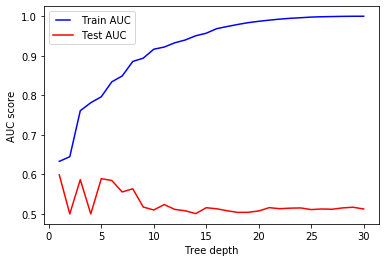

In [84]:
max_depths = np.linspace(1, 30, 30, endpoint=True)
train_results = []
test_results = []
for depth in max_depths:
    model = DecisionTreeClassifier(max_depth=depth,random_state=1)
    #model.fit(X, y)
    model.fit(X_train_sm_sc, y_train_sm)
    print(depth, 'depth')
    pred = model.predict(X_train_sm_sc)
    pred2 = model.predict(X_test_sc)
    roc1 = roc_auc_score(y_train_sm, pred)
    roc2 = roc_auc_score(y_test, pred2)
    print('AUC Train: ', roc1)
    print('AUC Test: ', roc2)
    train_results.append(roc1)
    test_results.append(roc2)
    print (" ")
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

0.1 min_samples_split
AUC Train:  0.8109730705163798
AUC Test:  0.584560420228586
 
0.2 min_samples_split
AUC Train:  0.7444822320932816
AUC Test:  0.5
 
0.30000000000000004 min_samples_split
AUC Train:  0.7336896168795115
AUC Test:  0.5867188745526414
 
0.4 min_samples_split
AUC Train:  0.7336896168795115
AUC Test:  0.5867188745526414
 
0.5 min_samples_split
AUC Train:  0.7336896168795115
AUC Test:  0.5867188745526414
 
0.6 min_samples_split
AUC Train:  0.644676568573015
AUC Test:  0.5
 
0.7000000000000001 min_samples_split
AUC Train:  0.644676568573015
AUC Test:  0.5
 
0.8 min_samples_split
AUC Train:  0.6329122709605774
AUC Test:  0.5987061643421421
 
0.9 min_samples_split
AUC Train:  0.6329122709605774
AUC Test:  0.5987061643421421
 
1.0 min_samples_split
AUC Train:  0.6329122709605774
AUC Test:  0.5987061643421421
 


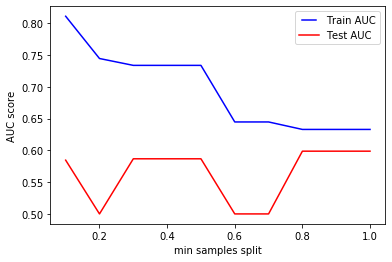

In [85]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
    model = DecisionTreeClassifier(max_depth=6,min_samples_split=min_samples_split,random_state=1)
   #model.fit(X, y)
    model.fit(X_train_sm_sc, y_train_sm)
    print(min_samples_split, 'min_samples_split')
    pred = model.predict(X_train_sm_sc)
    pred2 = model.predict(X_test_sc)
    roc1 = roc_auc_score(y_train_sm, pred)
    roc2 = roc_auc_score(y_test, pred2)
    print('AUC Train: ', roc1)
    print('AUC Test: ', roc2)
    train_results.append(roc1)
    test_results.append(roc2)
    print (" ")
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples split')
plt.show()

0.1 min_samples_leaf
AUC Train:  0.7336896168795115
AUC Test:  0.5867188745526414
 
0.2 min_samples_leaf
AUC Train:  0.6559897279289283
AUC Test:  0.5477711777285447
 
0.30000000000000004 min_samples_leaf
AUC Train:  0.6501596335369239
AUC Test:  0.5477711777285447
 
0.4 min_samples_leaf
AUC Train:  0.6184411438089951
AUC Test:  0.5085403598660809
 
0.5 min_samples_leaf
AUC Train:  0.5951554691837868
AUC Test:  0.5085403598660809
 


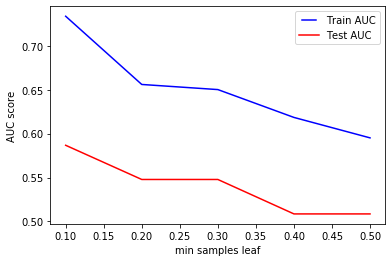

In [86]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
    model = DecisionTreeClassifier(max_depth=6,min_samples_leaf=min_samples_leaf,random_state=1)
    model.fit(X_train_sm_sc, y_train_sm)
    print(min_samples_leaf, 'min_samples_leaf')
    pred = model.predict(X_train_sm_sc)
    pred2 = model.predict(X_test_sc)
    roc1 = roc_auc_score(y_train_sm, pred)
    roc2 = roc_auc_score(y_test, pred2)
    print('AUC Train: ', roc1)
    print('AUC Test: ', roc2)
    train_results.append(roc1)
    test_results.append(roc2)
    print (" ")
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, 'b', label="Train AUC")
line2, = plt.plot(min_samples_leafs, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples leaf')
plt.show()

In [87]:
grid = {'max_depth':[5,6,15,20,30],'min_samples_split':np.linspace(0.1, 1.0, 10),'class_weight':[{0:1,1:1}, {0:1,1:9}, {0:1,1:100},{0:400,1:3600}]}

# define grid search
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(max_depth=6,min_samples_leaf=0.1), param_grid=grid,cv=cv, scoring='roc_auc')
grid_result = grid_search.fit(X_train_sm_sc, y_train_sm)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.810501 using {'class_weight': {0: 1, 1: 100}, 'max_depth': 5, 'min_samples_split': 0.1}


In [88]:
best_dt = DecisionTreeClassifier(criterion='entropy',max_depth=6,random_state=1)#, min_samples_split=0.6)
best_dt = best_dt.fit(X_train_sm_sc, y_train_sm)

cv_score = model_building(X_train_sm_sc, y_train_sm, 'precision', 5, best_dt)
metrics, conf_matrix,roc_auc = model_predict(best_dt, X_train_sm_sc, y_train_sm, X_test_sc, y_test)
acc_train=best_dt.score(X_train_sm_sc,y_train_sm)
acc_test=best_dt.score(X_test_sc,y_test)
metrics, conf_matrix,roc_auc
i = evaluation.shape[0]
evaluation.loc[i] = ['Tuned Decision Tree',list(conf_matrix),acc_train,acc_test,cv_score, metrics,roc_auc]

In [89]:
evaluation

,Model,Confusion Matrix,Accuracy on Train,Accuracy on Test,5-Fold Cross Validation (Precision),Precision (test),Roc_Auc
0,-,-,-,-,-,-,-
1,Logistic regression,"[[2226, 1376], [161, 243]]",0.574958,0.616326,0.5796,0.150093,0.609738
2,"Logistic regression C:10,newton-cg","[[2211, 1391], [158, 246]]",0.575618,0.61333,0.621042,0.150275,0.611368
3,Reduced Logistic regression,"[[2359, 1243], [161, 243]]",0.600881,0.649526,0.634763,0.163526,0.6282
4,Naive Bayes,"[[2379, 1223], [204, 200]]",0.714013,0.643784,0.689823,0.140548,0.577758
5,Bernouli Naive Bayes,"[[2954, 648], [277, 127]]",0.811979,0.769096,0.807209,0.163871,0.567228
6,SVM,"[[3602, 0], [404, 0]]",0.87028,0.899151,1,0,0.5
7,SVM poly,"[[3602, 0], [404, 0]]",0.87028,0.899151,0.939881,0,0.5
8,Tuned SVM,"[[2781, 821], [219, 185]]",0.568365,0.740389,0.612716,0.183897,0.614996
9,SVM with selected features,"[[2781, 821], [219, 185]]",0.568365,0.740389,0.612673,0.183897,0.614996


Best Threshold=0.317772, G-Mean=0.614


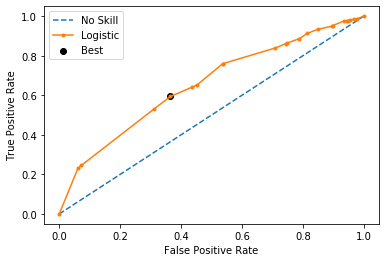

In [90]:
yhat = best_dt.predict_proba(X_test_sc)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, yhat)
# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model_lr_best
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [91]:
preds = np.where(best_dt.predict_proba(X_test_sc)[:,1] > 0.317772, 1, 0)

pd.DataFrame(data=[accuracy_score(y_test, preds),
                   precision_score(y_test, preds), roc_auc_score(y_test, preds)], 
             index=["accuracy", "precision", "roc_auc_score"])

,0
accuracy,0.630804
precision,0.154341
roc_auc_score,0.614492


In [92]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

from sklearn.feature_selection import SelectFromModel
from numpy import sort

best_dt = DecisionTreeClassifier(criterion='entropy',max_depth=6,random_state=1)#max_features='auto',min_impurity_split=0.138889,random_state=42)
best_dt = best_dt.fit(X_train_sm_sc, y_train_sm)
results=pd.DataFrame(columns=["Thresh","#features", "Precision", "Accuracy", "roc_auc_score","Confussion Matrix"])


thresholds = sort(best_dt.feature_importances_)
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(best_dt, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train_sm_sc)
    # train model
    selection_model = DecisionTreeClassifier(max_depth=10,max_features='auto',min_impurity_split=0.138889,random_state=42)
    selection_model.fit(select_X_train, y_train_sm)
    # eval model
    select_X_test = selection.transform(X_test_sc)
    y_pred = selection_model.predict(select_X_test)
    precision_test = precision_score(y_test, y_pred)
    accuracy_test = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    roc_auc=roc_auc_score(y_test, y_pred)
    i = results.shape[0]
    results.loc[i] = [thresh, select_X_train.shape[1],precision_test*100.0,accuracy_test*100,roc_auc,conf_matrix]
    


In [93]:
results.sort_values(by='roc_auc_score',ascending=False)

,Thresh,#features,Precision,Accuracy,roc_auc_score,Confussion Matrix
16,0.000507,15,31.081081,87.818273,0.564158,"[[3449, 153], [335, 69]]"
14,0.000185,17,22.614841,86.045931,0.548808,"[[3383, 219], [340, 64]]"
25,0.048228,6,25.560538,87.194209,0.547502,"[[3436, 166], [347, 57]]"
17,0.000574,14,23.577236,86.669995,0.545686,"[[3414, 188], [346, 58]]"
10,0.000000,31,17.134831,84.073889,0.534546,"[[3307, 295], [343, 61]]"
1,0.000000,31,17.134831,84.073889,0.534546,"[[3307, 295], [343, 61]]"
13,0.000000,31,17.134831,84.073889,0.534546,"[[3307, 295], [343, 61]]"
12,0.000000,31,17.134831,84.073889,0.534546,"[[3307, 295], [343, 61]]"
11,0.000000,31,17.134831,84.073889,0.534546,"[[3307, 295], [343, 61]]"
0,0.000000,31,17.134831,84.073889,0.534546,"[[3307, 295], [343, 61]]"


### F. Random Forest Classifier

In [94]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
rf=RandomForestClassifier(random_state=42)
rf = rf.fit(X_train_sm_sc, y_train_sm)

cv_score = model_building(X_train_sm_sc, y_train_sm, 'roc_auc', 5, rf)
metrics, conf_matrix, roc_auc = model_predict(rf, X_train_sm_sc, y_train_sm, X_test_sc, y_test)
acc_train=rf.score(X_train_sm_sc,y_train_sm)
acc_test=rf.score(X_test_sc,y_test)

i = evaluation.shape[0]
evaluation.loc[i] = ['Random Forest',conf_matrix,acc_train,acc_test,cv_score, metrics, roc_auc]

In [95]:
evaluation

,Model,Confusion Matrix,Accuracy on Train,Accuracy on Test,5-Fold Cross Validation (Precision),Precision (test),Roc_Auc
0,-,-,-,-,-,-,-
1,Logistic regression,"[[2226, 1376], [161, 243]]",0.574958,0.616326,0.5796,0.150093,0.609738
2,"Logistic regression C:10,newton-cg","[[2211, 1391], [158, 246]]",0.575618,0.61333,0.621042,0.150275,0.611368
3,Reduced Logistic regression,"[[2359, 1243], [161, 243]]",0.600881,0.649526,0.634763,0.163526,0.6282
4,Naive Bayes,"[[2379, 1223], [204, 200]]",0.714013,0.643784,0.689823,0.140548,0.577758
5,Bernouli Naive Bayes,"[[2954, 648], [277, 127]]",0.811979,0.769096,0.807209,0.163871,0.567228
6,SVM,"[[3602, 0], [404, 0]]",0.87028,0.899151,1,0,0.5
7,SVM poly,"[[3602, 0], [404, 0]]",0.87028,0.899151,0.939881,0,0.5
8,Tuned SVM,"[[2781, 821], [219, 185]]",0.568365,0.740389,0.612716,0.183897,0.614996
9,SVM with selected features,"[[2781, 821], [219, 185]]",0.568365,0.740389,0.612673,0.183897,0.614996


0.1 min_samples_split
AUC Train:  0.8607023875624654
AUC Test:  0.5276881380531169
 
0.2 min_samples_split
AUC Train:  0.8233620210993892
AUC Test:  0.5288426121901474
 
0.30000000000000004 min_samples_split
AUC Train:  0.7882426429761245
AUC Test:  0.5386941248261417
 
0.4 min_samples_split
AUC Train:  0.7711687951138257
AUC Test:  0.5469266249223479
 
0.5 min_samples_split
AUC Train:  0.70679483620211
AUC Test:  0.5445379629578727
 
0.6 min_samples_split
AUC Train:  0.7002706829539145
AUC Test:  0.5510841061896306
 
0.7000000000000001 min_samples_split
AUC Train:  0.5
AUC Test:  0.5
 
0.8 min_samples_split
AUC Train:  0.5
AUC Test:  0.5
 
0.9 min_samples_split
AUC Train:  0.5
AUC Test:  0.5
 
1.0 min_samples_split
AUC Train:  0.5
AUC Test:  0.5
 


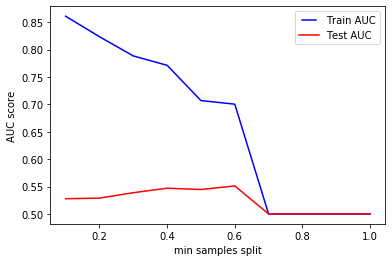

In [96]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
    model = RandomForestClassifier(min_samples_split=min_samples_split,random_state=42)
   #model.fit(X, y)
    model.fit(X_train_sm_sc, y_train_sm)
    print(min_samples_split, 'min_samples_split')
    pred = model.predict(X_train_sm_sc)
    pred2 = model.predict(X_test_sc)
    roc1 = roc_auc_score(y_train_sm, pred)
    roc2 = roc_auc_score(y_test, pred2)
    print('AUC Train: ', roc1)
    print('AUC Test: ', roc2)
    train_results.append(roc1)
    test_results.append(roc2)
    print (" ")
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples split')
plt.show()

0.1 min_samples_leaf
AUC Train:  0.7687048861743475
AUC Test:  0.548140884327189
 
0.2 min_samples_leaf
AUC Train:  0.7040880066629649
AUC Test:  0.5374523779418475
 
0.30000000000000004 min_samples_leaf
AUC Train:  0.6258675735702388
AUC Test:  0.4909944145441752
 
0.4 min_samples_leaf
AUC Train:  0.5
AUC Test:  0.5
 
0.5 min_samples_leaf
AUC Train:  0.5
AUC Test:  0.5
 


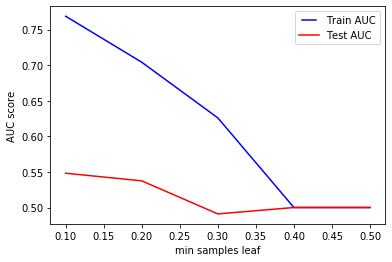

In [97]:

min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
    model = RandomForestClassifier(min_samples_leaf=min_samples_leaf,random_state=42)
    model.fit(X_train_sm_sc, y_train_sm)
    print(min_samples_leaf, 'min_samples_leaf')
    pred = model.predict(X_train_sm_sc)
    pred2 = model.predict(X_test_sc)
    roc1 = roc_auc_score(y_train_sm, pred)
    roc2 = roc_auc_score(y_test, pred2)
    print('AUC Train: ', roc1)
    print('AUC Test: ', roc2)
    train_results.append(roc1)
    test_results.append(roc2)
    print (" ")
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, 'b', label="Train AUC")
line2, = plt.plot(min_samples_leafs, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples leaf')
plt.show()

100 n_estimators
AUC Train:  1.0
AUC Test:  0.4998611882287618
 
150 n_estimators
AUC Train:  1.0
AUC Test:  0.4997223764575236
 
200 n_estimators
AUC Train:  1.0
AUC Test:  0.4998611882287618
 
250 n_estimators
AUC Train:  1.0
AUC Test:  0.4998611882287618
 
300 n_estimators
AUC Train:  1.0
AUC Test:  0.4998611882287618
 
320 n_estimators
AUC Train:  1.0
AUC Test:  0.5
 


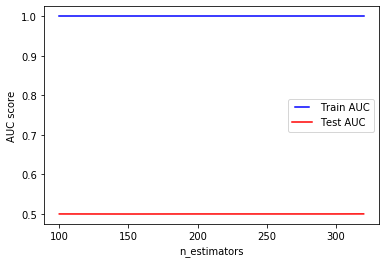

In [98]:
n_estimators = [100,150, 200,250,300,320]
train_results = []
test_results = []
for estimator in n_estimators:
    model = RandomForestClassifier(n_estimators=estimator,random_state=42)
    model.fit(X_train_sm_sc, y_train_sm)
    print(estimator, 'n_estimators')
    pred = model.predict(X_train_sm_sc)
    pred2 = model.predict(X_test_sc)
    roc1 = roc_auc_score(y_train_sm, pred)
    roc2 = roc_auc_score(y_test, pred2)
    print('AUC Train: ', roc1)
    print('AUC Test: ', roc2)
    train_results.append(roc1)
    test_results.append(roc2)
    print (" ")
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label='Train AUC')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

In [99]:
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV

param_grid = [
{'n_estimators': [50,100,200,250,300],'min_samples_split':np.linspace(0.1, 0.5, 5, endpoint=True) }]

# define grid search
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=RandomForestClassifier(criterion='entropy',random_state=42), param_grid=param_grid, cv=cv, scoring='roc_auc',error_score=0)
grid_result = grid_search.fit(X_train_sm_sc, y_train_sm)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.948577 using {'min_samples_split': 0.1, 'n_estimators': 200}


In [100]:
best_rf = RandomForestClassifier(n_estimators=200,min_samples_split=0.1,min_samples_leaf=0.1,random_state=42)
best_rf = best_rf.fit(X_train_sm_sc, y_train_sm)

cv_score = model_building(X_train_sm_sc, y_train_sm, 'roc_auc', 5, best_rf)
metrics, conf_matrix, roc_auc = model_predict(best_rf, X_train_sm_sc, y_train_sm, X_test_sc, y_test)
acc_train=best_rf.score(X_train_sm_sc,y_train_sm)
acc_test=best_rf.score(X_test_sc,y_test)

metrics, conf_matrix, acc_test,roc_auc
i = evaluation.shape[0]
evaluation.loc[i] = ['Tuned Random Forest',conf_matrix,acc_train,acc_test,cv_score, metrics, roc_auc]

In [101]:
evaluation

,Model,Confusion Matrix,Accuracy on Train,Accuracy on Test,5-Fold Cross Validation (Precision),Precision (test),Roc_Auc
0,-,-,-,-,-,-,-
1,Logistic regression,"[[2226, 1376], [161, 243]]",0.574958,0.616326,0.5796,0.150093,0.609738
2,"Logistic regression C:10,newton-cg","[[2211, 1391], [158, 246]]",0.575618,0.61333,0.621042,0.150275,0.611368
3,Reduced Logistic regression,"[[2359, 1243], [161, 243]]",0.600881,0.649526,0.634763,0.163526,0.6282
4,Naive Bayes,"[[2379, 1223], [204, 200]]",0.714013,0.643784,0.689823,0.140548,0.577758
5,Bernouli Naive Bayes,"[[2954, 648], [277, 127]]",0.811979,0.769096,0.807209,0.163871,0.567228
6,SVM,"[[3602, 0], [404, 0]]",0.87028,0.899151,1,0,0.5
7,SVM poly,"[[3602, 0], [404, 0]]",0.87028,0.899151,0.939881,0,0.5
8,Tuned SVM,"[[2781, 821], [219, 185]]",0.568365,0.740389,0.612716,0.183897,0.614996
9,SVM with selected features,"[[2781, 821], [219, 185]]",0.568365,0.740389,0.612673,0.183897,0.614996


Best Threshold=0.452017, G-Mean=0.617


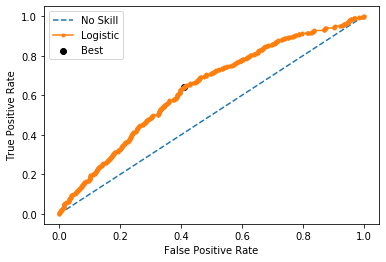

In [102]:
from numpy import sqrt, argmax
from sklearn.metrics import roc_curve
from matplotlib import pyplot

yhat = best_rf.predict_proba(X_test_sc)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, yhat)
# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model_lr_best
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [103]:
preds = np.where(best_rf.predict_proba(X_test_sc)[:,1] > 0.452017, 1, 0)

pd.DataFrame(data=[accuracy_score(y_test, preds), recall_score(y_test, preds),
                   precision_score(y_test, preds), roc_auc_score(y_test, preds)], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

,0
accuracy,0.595856
recall,0.641089
precision,0.149452
roc_auc_score,0.615936


In [104]:
# best_rf = RandomForestClassifier(n_estimators=100,max_features=0.2,random_state=42,min_samples_split=0.5)
# best_rf = best_rf.fit(X_train_sm_sc, y_train_sm)


results=pd.DataFrame(columns=["Thresh","#features", "Precision", "Accuracy", "roc_auc_score","Confussion Matrix"])
thresholds = sort(best_rf.feature_importances_)
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(best_rf, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train_sm_sc)
    # train model
    selection_model = RandomForestClassifier(n_estimators=100,max_features=0.2,random_state=42,min_samples_split=0.5)
    selection_model.fit(select_X_train, y_train_sm)
    # eval model
    select_X_test = selection.transform(X_test_sc)
    y_pred = selection_model.predict(select_X_test)
    precision_test = precision_score(y_test, y_pred)
    accuracy_test = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    roc_auc=roc_auc_score(y_test, y_pred)
    i = results.shape[0]
    results.loc[i] = [thresh, select_X_train.shape[1],precision_test*100.0,accuracy_test*100,roc_auc,conf_matrix]
results.sort_values(by='roc_auc_score',ascending=False)   

,Thresh,#features,Precision,Accuracy,roc_auc_score,Confussion Matrix
15,0.005279,16,15.311309,62.656016,0.613231,"[[2269, 1333], [163, 241]]"
5,0.000000,31,15.119852,61.582626,0.612756,"[[2221, 1381], [158, 246]]"
1,0.000000,31,15.119852,61.582626,0.612756,"[[2221, 1381], [158, 246]]"
6,0.000000,31,15.119852,61.582626,0.612756,"[[2221, 1381], [158, 246]]"
0,0.000000,31,15.119852,61.582626,0.612756,"[[2221, 1381], [158, 246]]"
4,0.000000,31,15.119852,61.582626,0.612756,"[[2221, 1381], [158, 246]]"
2,0.000000,31,15.119852,61.582626,0.612756,"[[2221, 1381], [158, 246]]"
3,0.000000,31,15.119852,61.582626,0.612756,"[[2221, 1381], [158, 246]]"
9,0.000504,22,14.779499,60.409386,0.608430,"[[2172, 1430], [156, 248]]"
25,0.082542,6,15.141753,62.905642,0.608026,"[[2285, 1317], [169, 235]]"


state_Vermont                0.000000
state_Colorado               0.000000
work_white_Collar            0.000000
previously_shoped            0.000000
work_retired                 0.000000
work_no_job                  0.000000
did_a purchase               0.000000
amount_purchase              0.000127
monthly_spent_electronics    0.000369
age                          0.000504
state_Hawaii                 0.000518
state_California             0.000690
work_blue_collar             0.001148
amount_financing             0.004086
require_financing            0.004307
state_Maine                  0.005279
prize_amount                 0.013010
work_professional            0.015770
state_Illinois               0.030649
promotion                    0.033856
live_with_parents            0.035540
work_manager                 0.036222
member                       0.037881
email                        0.038199
education                    0.067772
LT_clients                   0.082542
shop_competi

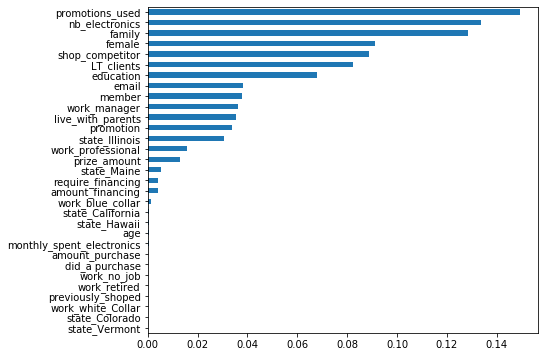

In [105]:
# Extracting feature importances from our model
feature_importances = pd.Series(best_rf.feature_importances_, 
                                index=data.drop(["clients", "got_a_TV"], axis=1).columns)

sub_feature_importances = feature_importances
print(sub_feature_importances.sort_values())

sub_feature_importances.sort_values(inplace=True)
sub_feature_importances.plot(kind='barh', figsize=(7,6))

### H. GradientBoostingClassifier

In [106]:
model_gb = GradientBoostingClassifier(random_state=42)#, n_estimators=200,
                                  # max_features='auto' , max_depth=5, subsample=0.8)
model_gb = model_gb.fit(X_train_sm_sc, y_train_sm)

cv_score = model_building(X_train_sm_sc, y_train_sm, 'precision', 5, model_gb)
metrics, conf_matrix,roc_auc = model_predict(model_gb, X_train_sm_sc, y_train_sm, X_test_sc, y_test)
acc_train=model_gb.score(X_train_sm_sc,y_train_sm)
acc_test=model_gb.score(X_test_sc,y_test)

i = evaluation.shape[0]
evaluation.loc[i] = ['GradientBoostingClassifier',conf_matrix,acc_train,acc_test,cv_score, metrics,roc_auc]

In [107]:
evaluation

,Model,Confusion Matrix,Accuracy on Train,Accuracy on Test,5-Fold Cross Validation (Precision),Precision (test),Roc_Auc
0,-,-,-,-,-,-,-
1,Logistic regression,"[[2226, 1376], [161, 243]]",0.574958,0.616326,0.5796,0.150093,0.609738
2,"Logistic regression C:10,newton-cg","[[2211, 1391], [158, 246]]",0.575618,0.61333,0.621042,0.150275,0.611368
3,Reduced Logistic regression,"[[2359, 1243], [161, 243]]",0.600881,0.649526,0.634763,0.163526,0.6282
4,Naive Bayes,"[[2379, 1223], [204, 200]]",0.714013,0.643784,0.689823,0.140548,0.577758
5,Bernouli Naive Bayes,"[[2954, 648], [277, 127]]",0.811979,0.769096,0.807209,0.163871,0.567228
6,SVM,"[[3602, 0], [404, 0]]",0.87028,0.899151,1,0,0.5
7,SVM poly,"[[3602, 0], [404, 0]]",0.87028,0.899151,0.939881,0,0.5
8,Tuned SVM,"[[2781, 821], [219, 185]]",0.568365,0.740389,0.612716,0.183897,0.614996
9,SVM with selected features,"[[2781, 821], [219, 185]]",0.568365,0.740389,0.612673,0.183897,0.614996


In [108]:
from sklearn.model_selection import GridSearchCV

p_test3 = {'max_depth':np.linspace(1, 32, 32, endpoint=True),}

tuning = GridSearchCV(estimator=GradientBoostingClassifier(random_state=42,n_estimators=100,learning_rate=0.1,loss='exponential'), 
            param_grid = p_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
tuning.fit(X_train_sm_sc,y_train_sm)
tuning.best_params_

{'max_depth': 12.0}

In [109]:
gb = GradientBoostingClassifier(random_state=42,n_estimators=100,learning_rate=0.1,loss='exponential')
gb = gb.fit(X_train_sm_sc, y_train_sm)
cv_score = model_building(X_train_sm_sc, y_train_sm, 'precision', 5, gb)
metrics, conf_matrix,roc_auc = model_predict(gb, X_train_sm_sc, y_train_sm, X_test_sc, y_test)
acc_train=gb.score(X_train_sm_sc,y_train_sm)
acc_test=gb.score(X_test_sc,y_test)
metrics, conf_matrix,roc_auc,acc_test

(1.0,
 [array([3602,    0]), array([403,   1])],
 0.5012376237623762,
 0.899400898652022)

1.0 learning_rates
AUC Train:  0.950687118267629
AUC Test:  0.5082806031852491
 
0.5 learning_rates
AUC Train:  0.9480496946141033
AUC Test:  0.5042330718357788
 
0.25 learning_rates
AUC Train:  0.945759300388673
AUC Test:  0.5021859418035085
 
0.1 learning_rates
AUC Train:  0.9431912826207662
AUC Test:  0.5012376237623762
 
0.05 learning_rates
AUC Train:  0.9414214325374792
AUC Test:  0.5
 
0.01 learning_rates
AUC Train:  0.9045669072737369
AUC Test:  0.5317370437765598
 


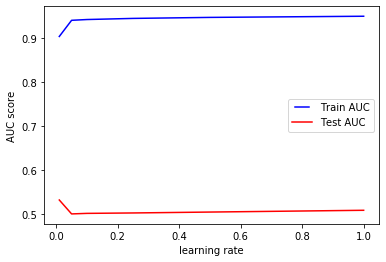

In [110]:
learning_rates = [1.0, 0.5, 0.25, 0.1, 0.05, 0.01]
train_results = []
test_results = []
for eta in learning_rates:
    model = GradientBoostingClassifier(learning_rate=eta,random_state=42)
    model.fit(X_train_sm_sc, y_train_sm)
    print(eta, 'learning_rates')
    pred = model.predict(X_train_sm_sc)
    pred2 = model.predict(X_test_sc)
    roc1 = roc_auc_score(y_train_sm, pred)
    roc2 = roc_auc_score(y_test, pred2)
    print('AUC Train: ', roc1)
    print('AUC Test: ', roc2)
    train_results.append(roc1)
    test_results.append(roc2)
    print (" ")
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results, 'b', label='Train AUC')
line2, = plt.plot(learning_rates, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('learning rate')
plt.show()

50 n_estimators
AUC Train:  0.941282620766241
AUC Test:  0.5012376237623762
 
100 n_estimators
AUC Train:  0.9431912826207662
AUC Test:  0.5012376237623762
 
150 n_estimators
AUC Train:  0.9440935591338145
AUC Test:  0.5008211884486616
 
200 n_estimators
AUC Train:  0.9447182121043864
AUC Test:  0.5005435649061852
 
250 n_estimators
AUC Train:  0.9451693503609107
AUC Test:  0.5017811886685615
 


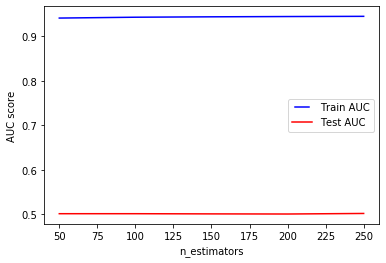

In [111]:
n_estimators = [50, 100,150, 200,250]
train_results = []
test_results = []
for estimator in n_estimators:
    model = GradientBoostingClassifier(n_estimators=estimator)
    model.fit(X_train_sm_sc, y_train_sm)
    print(estimator, 'n_estimators')
    pred = model.predict(X_train_sm_sc)
    pred2 = model.predict(X_test_sc)
    roc1 = roc_auc_score(y_train_sm, pred)
    roc2 = roc_auc_score(y_test, pred2)
    print('AUC Train: ', roc1)
    print('AUC Test: ', roc2)
    train_results.append(roc1)
    test_results.append(roc2)
    print (" ")
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label='Train AUC')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

1.0 depth
AUC Train:  0.9255621876735147
AUC Test:  0.5068354489530019
 
2.0 depth
AUC Train:  0.9422196002220988
AUC Test:  0.5
 
3.0 depth
AUC Train:  0.9431912826207662
AUC Test:  0.5012376237623762
 
4.0 depth
AUC Train:  0.9444058856191004
AUC Test:  0.4997223764575236
 
5.0 depth
AUC Train:  0.945759300388673
AUC Test:  0.5006823766774234
 
6.0 depth
AUC Train:  0.9480843975569129
AUC Test:  0.5009600002198998
 
7.0 depth
AUC Train:  0.9528387007218212
AUC Test:  0.49998831782123243
 
8.0 depth
AUC Train:  0.9611674069961132
AUC Test:  0.49998831782123243
 
9.0 depth
AUC Train:  0.9740421987784564
AUC Test:  0.5024635653459849
 
10.0 depth
AUC Train:  0.9901096612992781
AUC Test:  0.5028800006596995
 
11.0 depth
AUC Train:  0.9983689616879512
AUC Test:  0.5034235655658847
 
12.0 depth
AUC Train:  1.0
AUC Test:  0.5009483180411323
 
13.0 depth
AUC Train:  1.0
AUC Test:  0.5026023771172231
 
14.0 depth
AUC Train:  1.0
AUC Test:  0.5009483180411323
 
15.0 depth
AUC Train:  1.0
AUC T

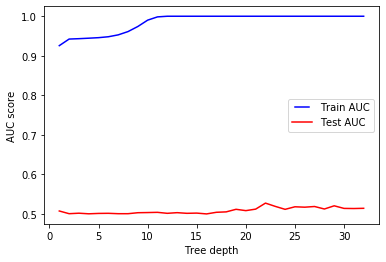

In [112]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for depth in max_depths:
    model = GradientBoostingClassifier(max_depth=depth)
    #model.fit(X, y)
    model.fit(X_train_sm_sc, y_train_sm)
    print(depth, 'depth')
    pred = model.predict(X_train_sm_sc)
    pred2 = model.predict(X_test_sc)
    roc1 = roc_auc_score(y_train_sm, pred)
    roc2 = roc_auc_score(y_test, pred2)
    print('AUC Train: ', roc1)
    print('AUC Test: ', roc2)
    train_results.append(roc1)
    test_results.append(roc2)
    print (" ")
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

0.1 min_samples_split
AUC Train:  0.9428095502498612
AUC Test:  0.5
 
0.2 min_samples_split
AUC Train:  0.9427054414214325
AUC Test:  0.4998611882287618
 
0.30000000000000004 min_samples_split
AUC Train:  0.942670738478623
AUC Test:  0.5
 
0.4 min_samples_split
AUC Train:  0.9422890061077179
AUC Test:  0.5
 
0.5 min_samples_split
AUC Train:  0.9422196002220988
AUC Test:  0.5
 
0.6 min_samples_split
AUC Train:  0.9418725707940033
AUC Test:  0.5
 
0.7000000000000001 min_samples_split
AUC Train:  0.9388534147695724
AUC Test:  0.5
 
0.8 min_samples_split
AUC Train:  0.9352790116601888
AUC Test:  0.5
 
0.9 min_samples_split
AUC Train:  0.9294489172681842
AUC Test:  0.5008211884486616
 
1.0 min_samples_split
AUC Train:  0.9255621876735147
AUC Test:  0.5068354489530019
 


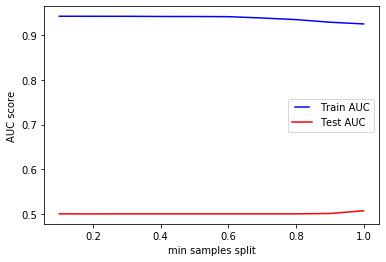

In [113]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
    model = GradientBoostingClassifier(min_samples_split=min_samples_split)
   #model.fit(X, y)
    model.fit(X_train_sm_sc, y_train_sm)
    print(min_samples_split, 'min_samples_split')
    pred = model.predict(X_train_sm_sc)
    pred2 = model.predict(X_test_sc)
    roc1 = roc_auc_score(y_train_sm, pred)
    roc2 = roc_auc_score(y_test, pred2)
    print('AUC Train: ', roc1)
    print('AUC Test: ', roc2)
    train_results.append(roc1)
    test_results.append(roc2)
    print (" ")
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples split')
plt.show()

0.1 min_samples_leaf
AUC Train:  0.9413173237090505
AUC Test:  0.5
 
0.2 min_samples_leaf
AUC Train:  0.9255968906163242
AUC Test:  0.5009600002198998
 
0.30000000000000004 min_samples_leaf
AUC Train:  0.8703845086063298
AUC Test:  0.511322779973722
 
0.4 min_samples_leaf
AUC Train:  0.7644711271515825
AUC Test:  0.5084359074441591
 
0.5 min_samples_leaf
AUC Train:  0.6017490283176014
AUC Test:  0.5134908549155859
 


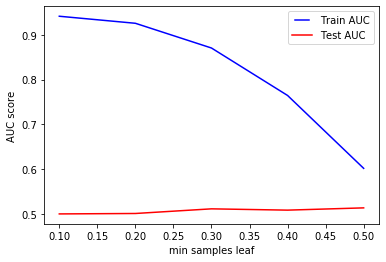

In [114]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
    model = GradientBoostingClassifier(min_samples_leaf=min_samples_leaf)
    model.fit(X_train_sm_sc, y_train_sm)
    print(min_samples_leaf, 'min_samples_leaf')
    pred = model.predict(X_train_sm_sc)
    pred2 = model.predict(X_test_sc)
    roc1 = roc_auc_score(y_train_sm, pred)
    roc2 = roc_auc_score(y_test, pred2)
    print('AUC Train: ', roc1)
    print('AUC Test: ', roc2)
    train_results.append(roc1)
    test_results.append(roc2)
    print (" ")
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, 'b', label="Train AUC")
line2, = plt.plot(min_samples_leafs, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples leaf')
plt.show()

In [115]:
# gb = GradientBoostingClassifier(random_state=42,learning_rate=0.1,
#  max_depth= 22,
#  n_estimators=250)

# gb = GradientBoostingClassifier(random_state=42,learning_rate=0.1,
#  max_depth= 22,
#  n_estimators=250)
gb = GradientBoostingClassifier(random_state=42,learning_rate=0.01,
 max_depth= 22)
gb = gb.fit(X_train_sm_sc, y_train_sm)
cv_score = model_building(X_train_sm_sc, y_train_sm, 'precision', 5, gb)
metrics, conf_matrix,roc_auc = model_predict(gb, X_train_sm_sc, y_train_sm, X_test_sc, y_test)
acc_train=gb.score(X_train_sm_sc,y_train_sm)
acc_test=gb.score(X_test_sc,y_test)
metrics, conf_matrix,roc_auc,acc_test
i = evaluation.shape[0]
evaluation.loc[i] = ['Tuned GradientBoostingClassifier',conf_matrix,acc_train,acc_test,cv_score, metrics,roc_auc]

In [116]:
evaluation

,Model,Confusion Matrix,Accuracy on Train,Accuracy on Test,5-Fold Cross Validation (Precision),Precision (test),Roc_Auc
0,-,-,-,-,-,-,-
1,Logistic regression,"[[2226, 1376], [161, 243]]",0.574958,0.616326,0.5796,0.150093,0.609738
2,"Logistic regression C:10,newton-cg","[[2211, 1391], [158, 246]]",0.575618,0.61333,0.621042,0.150275,0.611368
3,Reduced Logistic regression,"[[2359, 1243], [161, 243]]",0.600881,0.649526,0.634763,0.163526,0.6282
4,Naive Bayes,"[[2379, 1223], [204, 200]]",0.714013,0.643784,0.689823,0.140548,0.577758
5,Bernouli Naive Bayes,"[[2954, 648], [277, 127]]",0.811979,0.769096,0.807209,0.163871,0.567228
6,SVM,"[[3602, 0], [404, 0]]",0.87028,0.899151,1,0,0.5
7,SVM poly,"[[3602, 0], [404, 0]]",0.87028,0.899151,0.939881,0,0.5
8,Tuned SVM,"[[2781, 821], [219, 185]]",0.568365,0.740389,0.612716,0.183897,0.614996
9,SVM with selected features,"[[2781, 821], [219, 185]]",0.568365,0.740389,0.612673,0.183897,0.614996


In [52]:
from numpy import sort
gb = GradientBoostingClassifier(random_state=42,learning_rate=0.01,
 max_depth= 22,
 n_estimators=250)
gb = gb.fit(X_train_sm_sc, y_train_sm)
from sklearn.feature_selection import SelectFromModel

# results=pd.DataFrame(columns=["Thresh","#features", "Precision", "Accuracy", "roc_auc_score","Confussion Matrix"])


thresholds = sort(gb.feature_importances_)
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(gb, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train_sm_sc)
    # train model
    selection_model = GradientBoostingClassifier(random_state=42,learning_rate=0.01,
 max_depth= 22,
 n_estimators=250)
    selection_model.fit(select_X_train, y_train_sm)
    # eval model
    select_X_test = selection.transform(X_test_sc)
    y_pred = selection_model.predict(select_X_test)
    precision_test = precision_score(y_test, y_pred)
    accuracy_test = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    roc_auc=roc_auc_score(y_test, y_pred)
    i = results.shape[0]
    results.loc[i] = [thresh, select_X_train.shape[1],precision_test*100.0,accuracy_test*100,roc_auc,conf_matrix]
    


In [53]:
results.sort_values(by='roc_auc_score',ascending=False)

,Thresh,#features,Precision,Accuracy,roc_auc_score,Confussion Matrix
18,0.027026,13,17.456359,83.399900,0.540687,"[[3271, 331], [334, 70]]"
16,0.016046,15,16.551724,82.651023,0.538720,"[[3239, 363], [332, 72]]"
11,0.008715,20,17.142857,83.599601,0.537402,"[[3283, 319], [338, 66]]"
15,0.013261,16,16.428571,82.875686,0.536673,"[[3251, 351], [335, 69]]"
10,0.008383,21,16.886544,83.649526,0.535482,"[[3287, 315], [340, 64]]"
13,0.010693,18,16.402116,83.574638,0.532868,"[[3286, 316], [342, 62]]"
17,0.016859,14,15.441176,82.875686,0.530080,"[[3257, 345], [341, 63]]"
12,0.010379,19,15.284974,83.225162,0.527628,"[[3275, 327], [345, 59]]"
14,0.011210,17,15.119363,83.349975,0.526125,"[[3282, 320], [347, 57]]"
9,0.007137,22,14.814815,83.275087,0.524610,"[[3280, 322], [348, 56]]"


did_a purchase               0.000830
state_Vermont                0.002146
work_retired                 0.002905
promotion                    0.003031
work_no_job                  0.003487
work_blue_collar             0.004670
work_white_Collar            0.005736
require_financing            0.006101
state_California             0.006415
work_manager                 0.007137
previously_shoped            0.008383
state_Hawaii                 0.008715
work_professional            0.010379
email                        0.010693
state_Colorado               0.011210
female                       0.013261
prize_amount                 0.016046
state_Maine                  0.016859
amount_financing             0.027026
state_Illinois               0.030493
age                          0.030978
family                       0.033967
monthly_spent_electronics    0.035484
amount_purchase              0.038596
member                       0.040888
LT_clients                   0.051294
live_with_pa

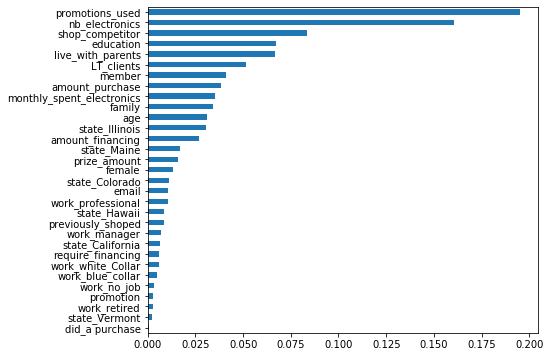

In [54]:
# Extracting feature importances from our model
feature_importances = pd.Series(gb.feature_importances_, 
                                index=data.drop(["clients", "got_a_TV"], axis=1).columns)

sub_feature_importances = feature_importances
print(sub_feature_importances.sort_values())

sub_feature_importances.sort_values(inplace=True)
sub_feature_importances.plot(kind='barh', figsize=(7,6))

### G. XGBoost

In [55]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [49]:
from xgboost import XGBClassifier
# xg = XGBClassifier(random_state=42)#objective='reg:logistic',eval_metric='error',random_state=42)
# xg = xg.fit(X_train_sm_sc, y_train_sm)

# cv_score = model_building(X_train_sm_sc, y_train_sm, 'roc_auc', 5, xg)
# metrics, conf_matrix, roc_auc = model_predict(xg, X_train_sm_sc, y_train_sm, X_test_sc, y_test)
# acc_train=xg.score(X_train_sm_sc,y_train_sm)
# acc_test=xg.score(X_test_sc,y_test)

# i = evaluation.shape[0]
# evaluation.loc[i] = ['XGBoost',conf_matrix,acc_train,acc_test,cv_score, metrics,roc_auc]

In [59]:
evaluation

,Model,Confusion Matrix,Accuracy on Train,Accuracy on Test,5-Fold Cross Validation (Precision),Precision (test),Roc_Auc
0,-,-,-,-,-,-,-
1,XGBoost,"[[3602, 0], [404, 0]]",0.943504,0.899151,0.955582,0,0.5


In [51]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import RepeatedStratifiedKFold
# # {'clf__colsample_bytree': 0.1,
# #  'clf__gamma': 0.0,
# #  'clf__learning_rate': 0.01,
# #  'clf__max_depth': 3,
# #  'clf__n_estimators': 50,
# #  'fs__k': 10}
# #model.best_params_
# estimator = XGBClassifier(random_state=42)
# parameters = {
#     'max_depth': range (2, 31, 1),
#     'n_estimators': range(50, 250, 50),
#     'learning_rate': [0.1, 0.01, 0.05],
#     'scale_pos_weight':[1, 9,50,99, 100, 1000],
#     'objective':['reg:logistic','binary:logistic']
    
# }
# grid_search = GridSearchCV(
#     estimator=estimator,
#     param_grid=parameters,
#     scoring = 'roc_auc',
#     n_jobs = -1,
#     cv = 5,
#     verbose=True
# )
# grid_search.fit(X_train_sm_sc, y_train_sm)
# grid_search.best_estimator_

In [ ]:
from xgboost import XGBClassifier
xg = XGBClassifier(objective='reg:logistic',eval_metric='error',scale_pos_weight=9,random_state=42)
xg = xg.fit(X_train_sm_sc, y_train_sm)

cv_score = model_building(X_train_sm_sc, y_train_sm, 'roc_auc', 5, xg)
metrics, conf_matrix,roc_auc = model_predict(xg, X_train_sm_sc, y_train_sm, X_test_sc, y_test)
acc_train=xg.score(X_train_sm_sc,y_train_sm)
acc_test=xg.score(X_test_sc,y_test)

i = evaluation.shape[0]
evaluation.loc[i] = ['XGBoost Tuned',conf_matrix,acc_train,acc_test,cv_score, metrics,roc_auc]

In [ ]:
evaluation

In [ ]:
xg = XGBClassifier(objective='reg:logistic',eval_metric='error',scale_pos_weight=9,random_state=42)
xg.fit(X_train_sm_sc, y_train_sm)
results=pd.DataFrame(columns=["Thresh","#features", "Precision", "Accuracy", "roc_auc_score","Confussion Matrix"])

thresholds = sort(xg.feature_importances_)
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(xg, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train_sm_sc)
    # train model
    selection_model = XGBClassifier(objective='reg:logistic',eval_metric='error',random_state=42,scale_pos_weight=9)
    selection_model.fit(select_X_train, y_train_sm)
    # eval model
    select_X_test = selection.transform(X_test_sc)
    y_pred = selection_model.predict(select_X_test)
    precision_test = precision_score(y_test, y_pred)
    roc_auc= roc_auc_score(y_test,y_pred)
    accuracy_test= accuracy_score(y_test,y_pred)
    i = results.shape[0]
    results.loc[i] = [thresh, select_X_train.shape[1],precision_test*100.0,accuracy_test*100,roc_auc,conf_matrix]


In [ ]:
results.sort_values(by='roc_auc_score',ascending=False)

In [ ]:
# Extracting feature importances from our model
feature_importances = pd.Series(xg.feature_importances_, 
                                index=data.drop(["clients", "got_a_TV"], axis=1).columns)

sub_feature_importances = feature_importances
print(sub_feature_importances.sort_values())

sub_feature_importances.sort_values(inplace=True)
sub_feature_importances.plot(kind='barh', figsize=(7,6))

In [ ]:
sub_feature_importances[sub_feature_importances<=0.001394].index.to_list()

In [ ]:
worst= ['did_a purchase']

Xdt=X.copy()
Xdt.drop(worst,axis=1,inplace=True)

X_train, X_test, y_train, y_test = train_test_split(Xdt, y, test_size=0.2, random_state=42, stratify=y)

X_traindt, y_traindt = upsampling_data(X_train, y_train)
X_traindt, X_testdt = minmax_data(X_traindt, X_test)

xg.fit(X_traindt, y_traindt)


cv_score = model_building(X_traindt, y_traindt, 'precision', 5, xg)
metrics, conf_matrix,roc_auc = model_predict(xg, X_traindt, y_traindt, X_testdt, y_test)
acc_train=xg.score(X_traindt,y_traindt)
acc_test=xg.score(X_testdt,y_test)
metrics, conf_matrix